# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [54]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_auc_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Load the data

In [21]:
data = pd.read_csv('/content/INNHotelsGroup.csv') # Code to load the data
df = data.copy()  # make a copy of the data

## Data Overview

- Observations
- Sanity checks

In [ ]:
# View first 5 rows of the data and the bottom 5 rows of the data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

## Observation
#### The dataset seemed to be well-structured and it contains both numerical and categorical variables. Overall, there seems to be 19 separate columns in the dataset

In [ ]:
# Determine the size of the dataset
df.shape

(36275, 19)

## Observation
#### The dataset containes 36,275 rows of data which corresponds to a unique hotel booking and also 19 columns of different variables.

In [ ]:
# Determine the different types of datasets presents and to have an idea if there are some missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Observation
#### The dataset contains 13 variables that are of the integer datatype, 5 variables that are of the string datatype (categorical data), and only one variable (avg_price_per_room ) that is of the float datatype. Also,Non-Null Count, it appears the dataset do not have any missing values and the memory usage of the dataset is about 5.3 MB.

In [ ]:
# Obtaining the summary statistics of the dataset
df.describe(include = 'all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

## Observation
#### The maximum number of adults in a booking is 4 adults while the maximum number of children is about 10 for a given booking. The average number of week nights booked by the customers is approximately 3 while the maximum is about 17 whereas for the weekend nights, the average is about 1 while the maximum is about 7. It appears that customers prefer to book for more week nights compared to the weekend nights. In terms of the meal plans, it appears that the Meal Plan 1 is the most preferred meal plans among the customers while the Room Type 1 is the room that received the highest reservations among the customers.It appears also that the customers prefers making their bookings online since it has the highest market segment type. The average price for a room is about 103 dollars and it ranges from 0 to 540 dollars.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [3]:
# Defining functions that will plot the histogram and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [4]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Distribution of the average price per room

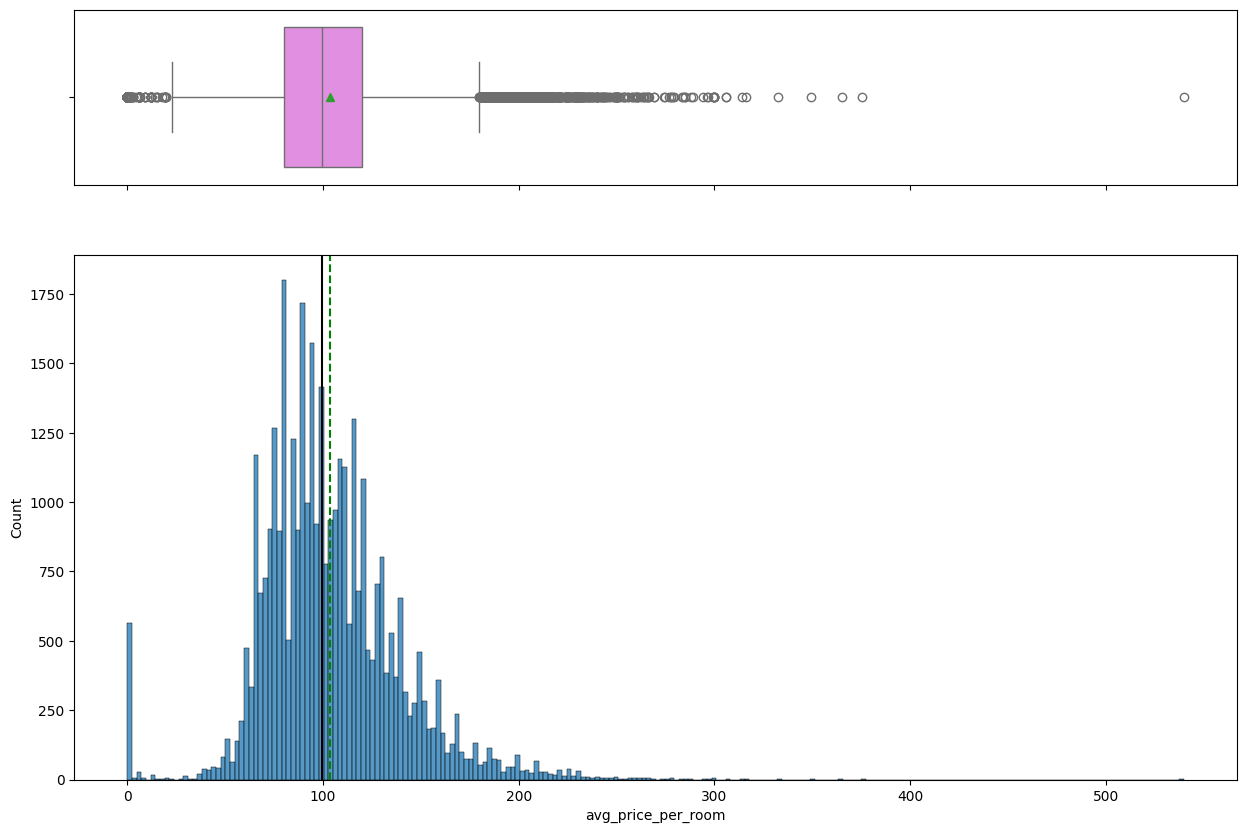

In [ ]:
histogram_boxplot(df,'avg_price_per_room')

## Observation
#### It will be observed that the distribution of the average price per room is close to normal since the median and the mean are quite close. However, there seems to be quite a number of outliers to the right and a few outliers to the left, hence the skewness in the distribution. Also, an unusual situation arises where a substantial number of rooms have an average price of zero which needs to be treated when performing outliers treatment. Also, an outlier exist which is quite different from the rest of the outliers and it is wide apart (above 500 dollars), therefore it needs to be treated in subsequent steps.

In [ ]:
# It will be proper to further investigate the data to know more about the rooms whose average price is zero.
df[df['avg_price_per_room'] == 0].shape[0] # this code will give all the rooms with average price of zero

545

## Observation
#### There are a total of 545 rooms whose average price is zero. This is quite substantial and further investigation needs to be carried out.

In [ ]:
# The code below will give the spread in the market segment which have an average room price of zero
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

## Observation
#### It will be observed that the complementary market segment type contains the highest number if rooms whose average price is zero and closely followed by the Online market segment type

## Initial Outliers treatment

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
print(Upper_Whisker)

# Calculating value of lower whisker
lower_Whisker = Q1 - 1.5 * IQR
print(lower_Whisker)

179.55
20.749999999999993


In [ ]:
# assigning the outliers whose values are above 500 dollars as the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## Distribution of the lead times

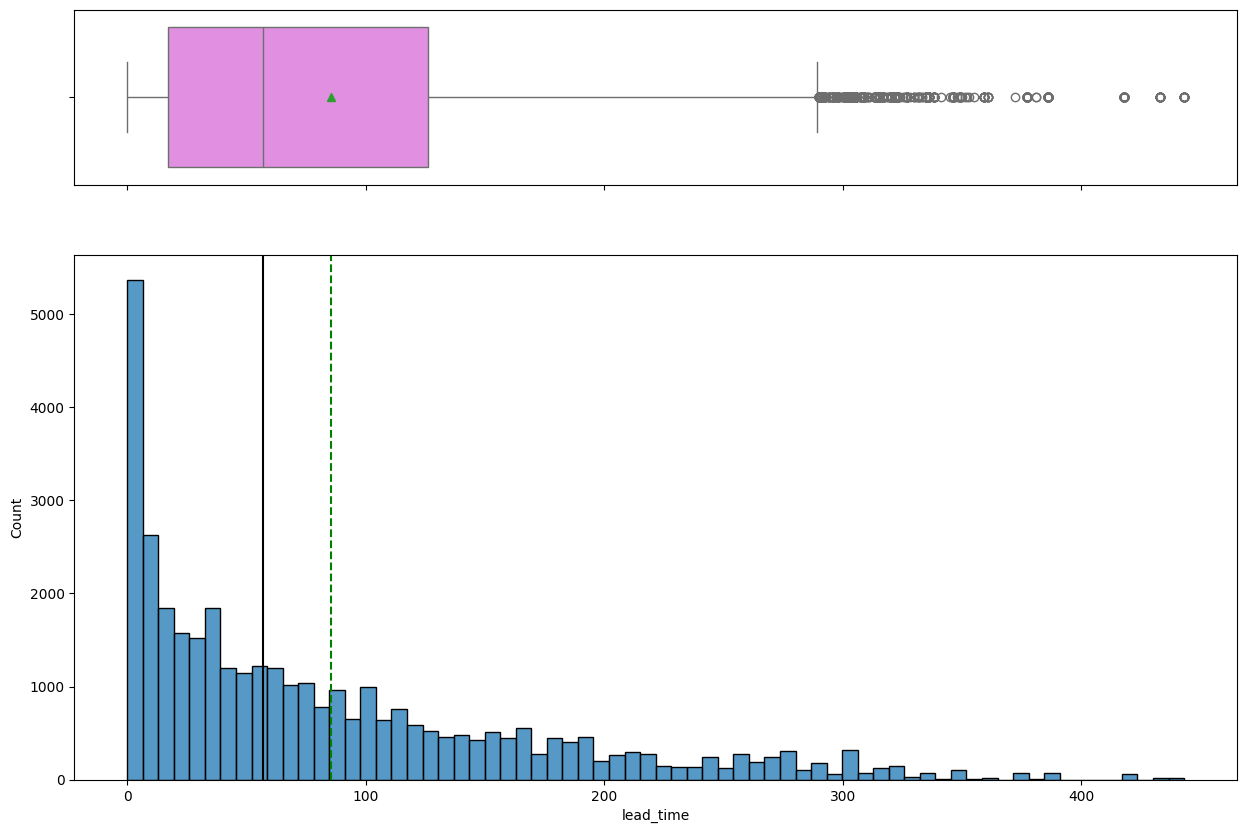

In [ ]:
histogram_boxplot(data, "lead_time")

## Observation
#### The distribution of the lead time data is skewed to the right where lots of outliers exist.

## Distribution of the previous bookings not cancelled


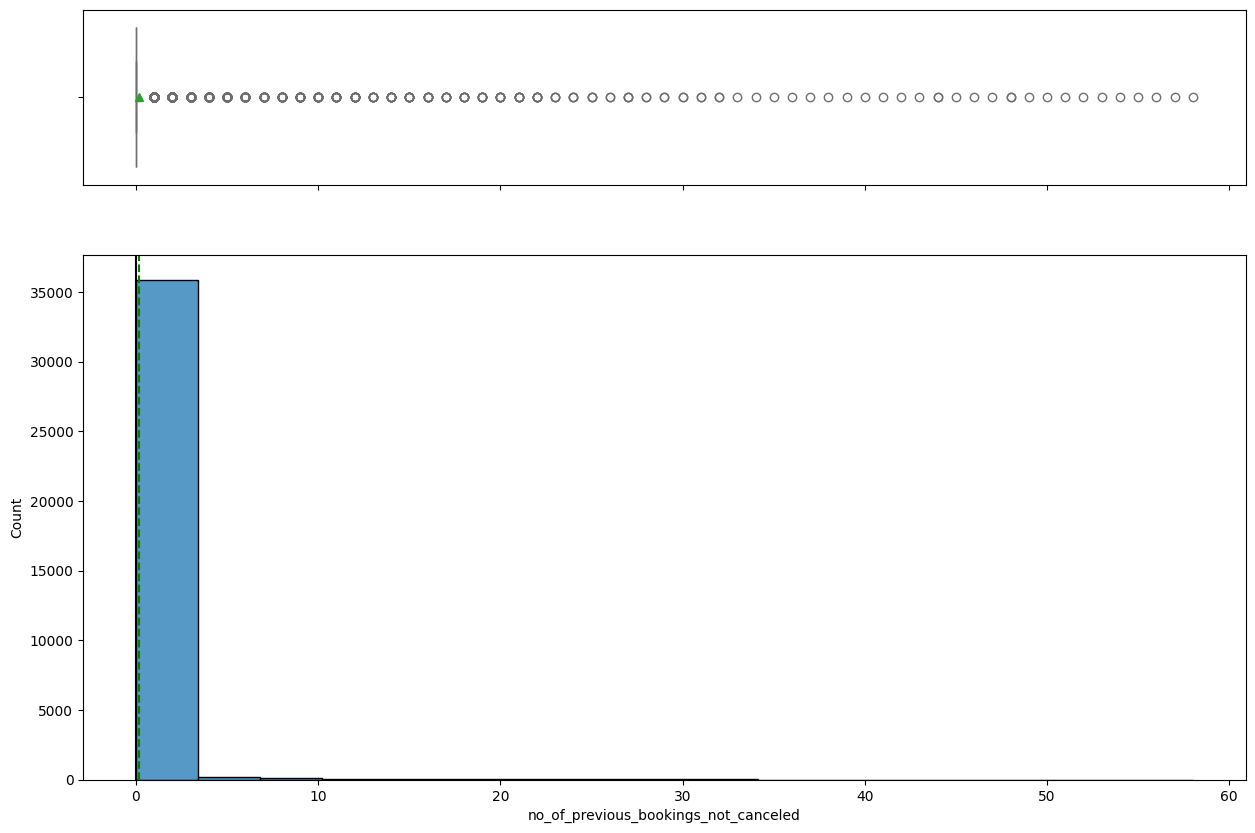

In [ ]:
histogram_boxplot(df,'no_of_previous_bookings_not_canceled')

## Observations
#### It will be noticed that the number of previous bookings not cancelled is very low ranging from between 0 and 5.

## Distribution of previous booking cancellations

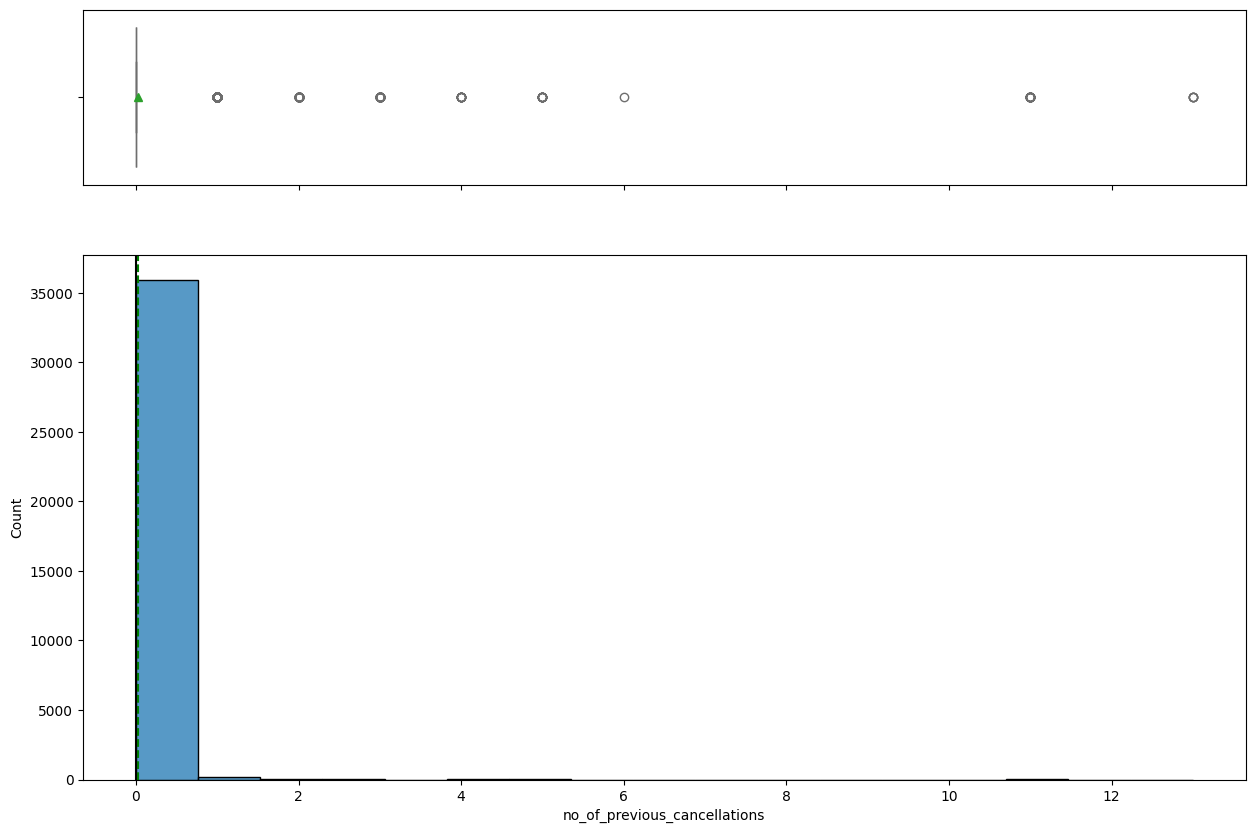

In [ ]:
histogram_boxplot(df,'no_of_previous_cancellations')

## Observations
#### Number of previous booking cancellation is also quite low with majoring ranging from 0 to 1.

##  The distribution of the number of children included in the bookings

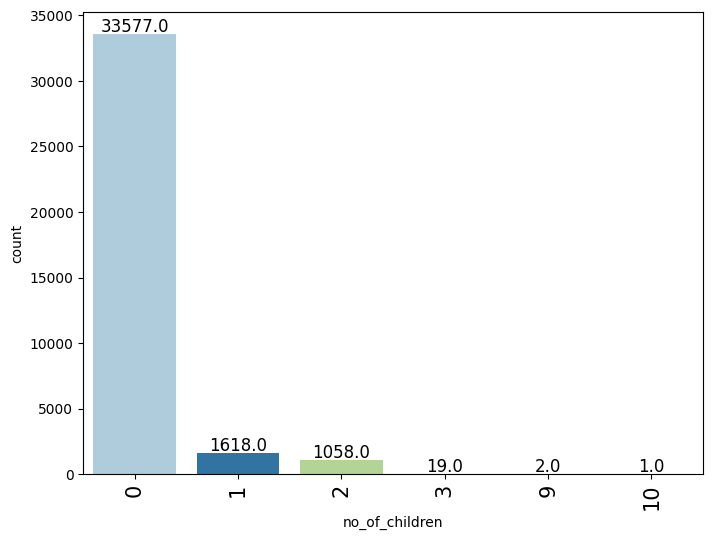

In [ ]:
labeled_barplot(df,'no_of_children')

In [ ]:
df['no_of_children'].value_counts(normalize= True)

no_of_children
0    0.92562
1    0.04460
2    0.02917
3    0.00052
9    0.00006
10   0.00003
Name: proportion, dtype: float64

## Observation
#### It will be noted that about 93% of the bookings do not have any child included while about 4% and 3% of the bookings had 1 child and 2 children respectively.

## Distribution of the number of adults in the booking

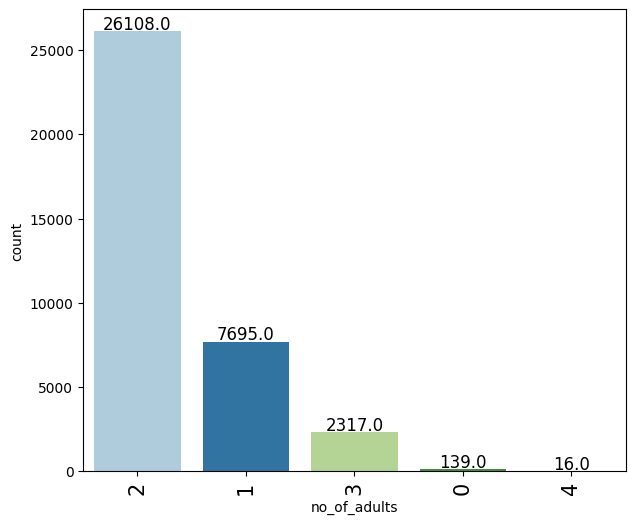

In [ ]:
labeled_barplot(df,'no_of_adults')

In [ ]:
df['no_of_adults'].value_counts(normalize= True)

no_of_adults
2   0.71972
1   0.21213
3   0.06387
0   0.00383
4   0.00044
Name: proportion, dtype: float64

## Observation
#### It will be observed that about 72% of adults that booked came in pairs probably they are couples or partners whereas only 21% of adults booked as single individual while 6.3% of adults came as a company of 3 adults. There seem to be a percentage of the data that shows that no adult was present, therefore it needs further investigation.

## Distribution of the number of weekend night bookings

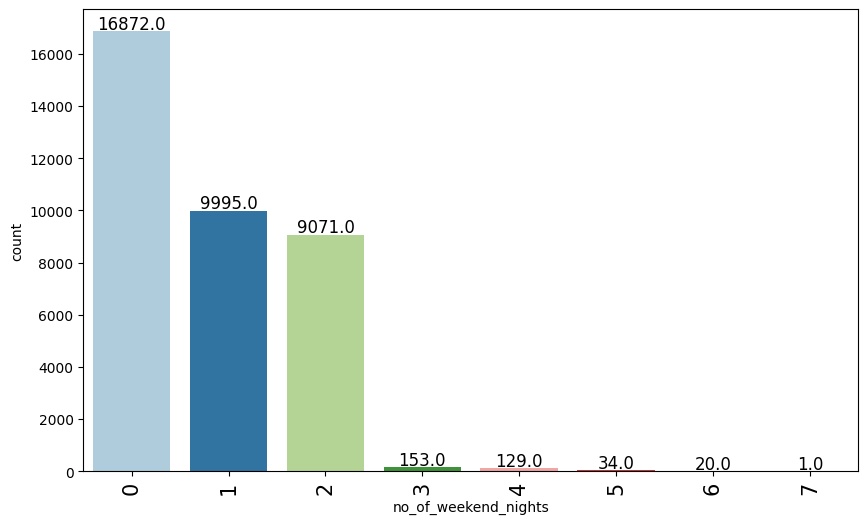

In [ ]:
labeled_barplot(df,'no_of_weekend_nights')

In [ ]:
df['no_of_weekend_nights'].value_counts(normalize= True)

no_of_weekend_nights
0   0.46511
1   0.27553
2   0.25006
3   0.00422
4   0.00356
5   0.00094
6   0.00055
7   0.00003
Name: proportion, dtype: float64

## Observation
#### It will be observed that about 47% of the bookings did not have weekend nights included. 28% and 25% of the bookings had 1 weekend night and 2 weekend nights respectively. Overall, it appears that most of the clients do not prefer booking and staying over night during the weekends.

## Distribution of the week night bookings


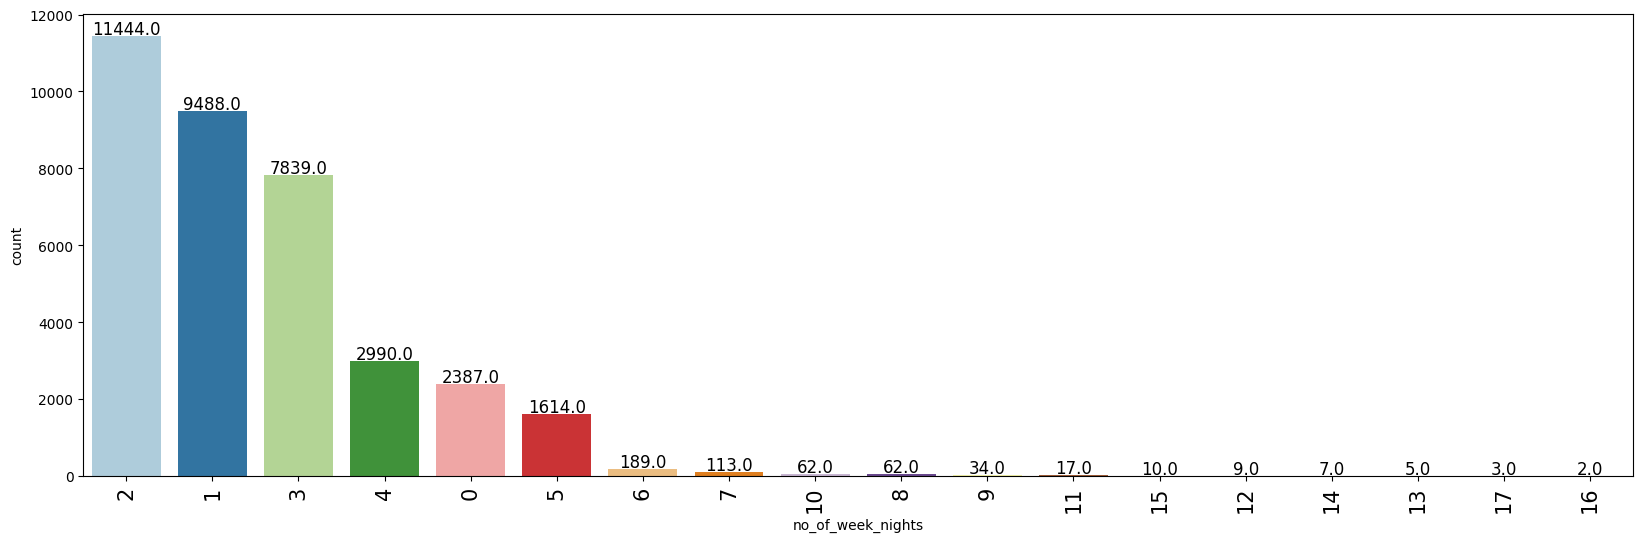

In [ ]:
labeled_barplot(df,'no_of_week_nights')

In [ ]:
df['no_of_week_nights'].value_counts(normalize= True)

no_of_week_nights
2    0.31548
1    0.26156
3    0.21610
4    0.08243
0    0.06580
5    0.04449
6    0.00521
7    0.00312
10   0.00171
8    0.00171
9    0.00094
11   0.00047
15   0.00028
12   0.00025
14   0.00019
13   0.00014
17   0.00008
16   0.00006
Name: proportion, dtype: float64

## Observation
#### It will be observed that about 32% of the bookings had 2 week nights included while about 26% and 22% had 1 week night and 3 week nights included. Apparently, it seems the majority (about 71%) of the bookings had a maximum of 3 week nights included.

## Distribution of the required car parking space

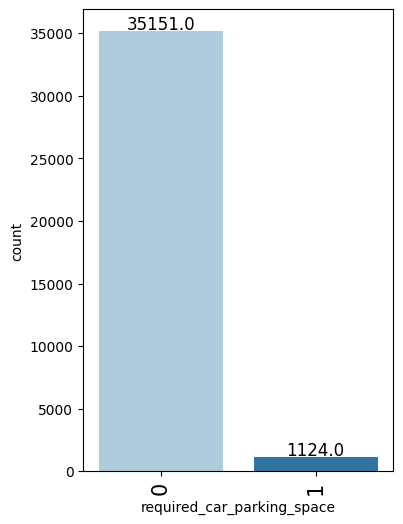

In [ ]:
labeled_barplot(df,'required_car_parking_space')

In [ ]:
df['required_car_parking_space'].value_counts(normalize= True)

required_car_parking_space
0   0.96901
1   0.03099
Name: proportion, dtype: float64

## Observation
#### It will be noted that about 97% of the bookings do not require any car parking space while 3% require car parking space. Hence the hotel may not need to invest in building large parking spaces.

## Distribution of the room type reserved

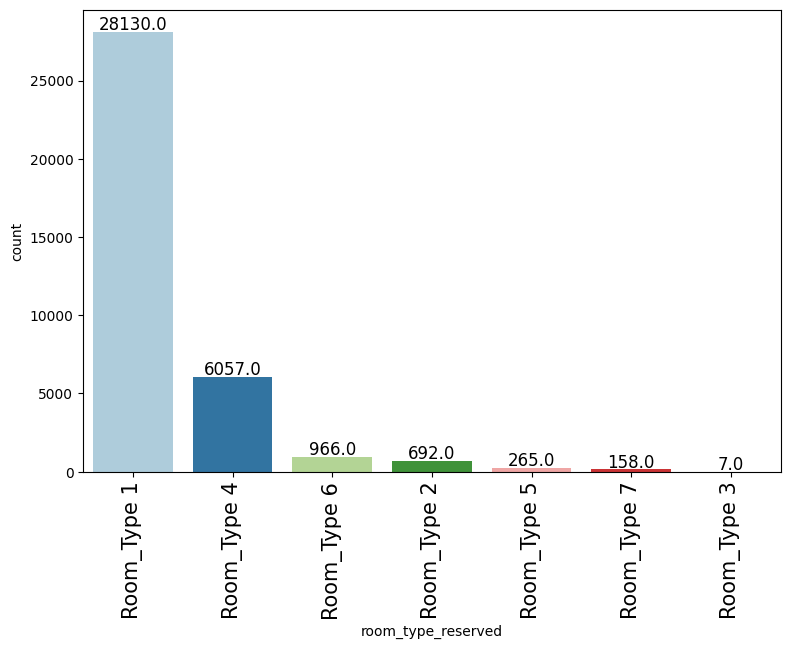

In [ ]:
labeled_barplot(df,'room_type_reserved')

In [ ]:
df['room_type_reserved'].value_counts(normalize= True)

room_type_reserved
Room_Type 1   0.77547
Room_Type 4   0.16697
Room_Type 6   0.02663
Room_Type 2   0.01908
Room_Type 5   0.00731
Room_Type 7   0.00436
Room_Type 3   0.00019
Name: proportion, dtype: float64

## Observation
#### Majority of the bookings requested for Room type 1 (about 78%) while only about 17% requested for Room type 4. Room types 6 and 2 had a total of about 3% and 2% of the entire bookings.

## Distribution  of the type of meal plan

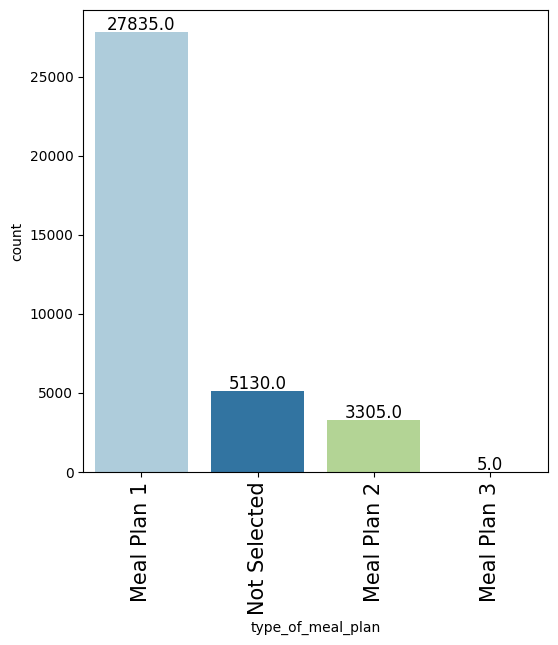

In [ ]:
labeled_barplot(df,'type_of_meal_plan')

In [ ]:
df['type_of_meal_plan'].value_counts(normalize= True)

type_of_meal_plan
Meal Plan 1    0.76733
Not Selected   0.14142
Meal Plan 2    0.09111
Meal Plan 3    0.00014
Name: proportion, dtype: float64

## Observation
#### It will be noted that about 77% of the bookings ordered for Meal Plan 1 while 14% of the bookings did not select any meal plan. Only about 1% of the booking opted for Meal Plan 2.

## Distribution of the arrival month

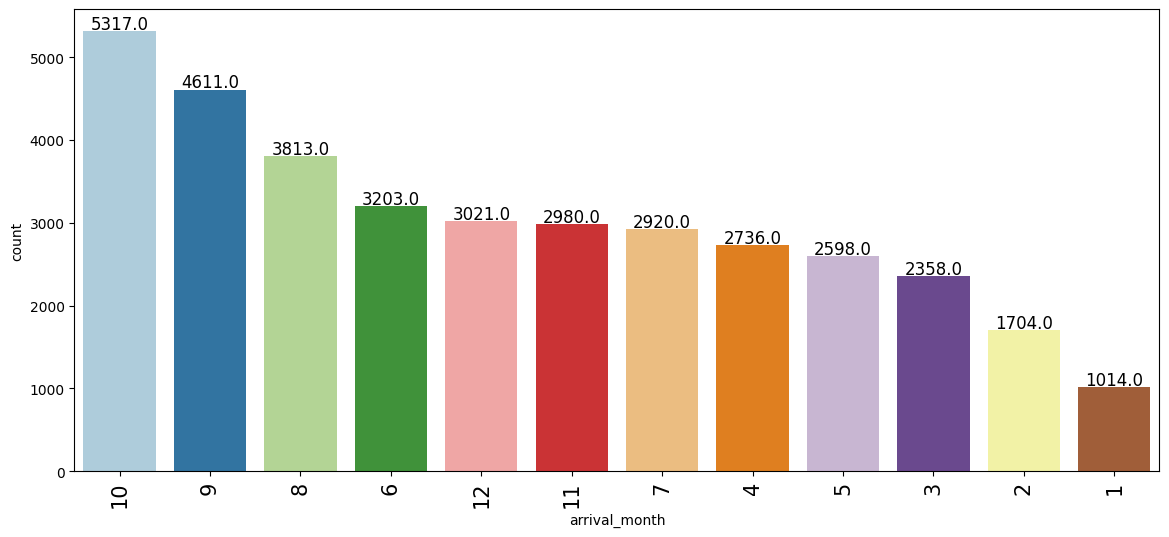

In [ ]:
labeled_barplot(df,'arrival_month')

In [ ]:
df['arrival_month'].value_counts(normalize= True)

arrival_month
10   0.14657
9    0.12711
8    0.10511
6    0.08830
12   0.08328
11   0.08215
7    0.08050
4    0.07542
5    0.07162
3    0.06500
2    0.04697
1    0.02795
Name: proportion, dtype: float64

## Observation
#### 15% of the bookings planned to arrive in the month of October while about 13% and 11% planned to arrive in the month of September and August respectively. The months with the lowest arrival of guests are the first quarter of the year which probably may coincide with the period of the year where the severity of the winter season is at its peak, hence limiting people from travelling and staying in hotels.

## Distribution of the arrival year.

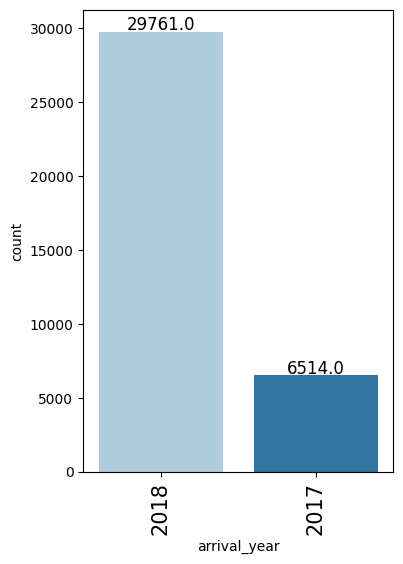

In [ ]:
labeled_barplot(df,'arrival_year')

In [ ]:
df['arrival_year'].value_counts(normalize= True)

arrival_year
2018   0.82043
2017   0.17957
Name: proportion, dtype: float64

## Observation
#### it will be observed that the data was captured for the year 2017 and 2018 and about 82% of the bookings arrived in 2018while 18% arrived in 2017.

## Distribution of the arrival date

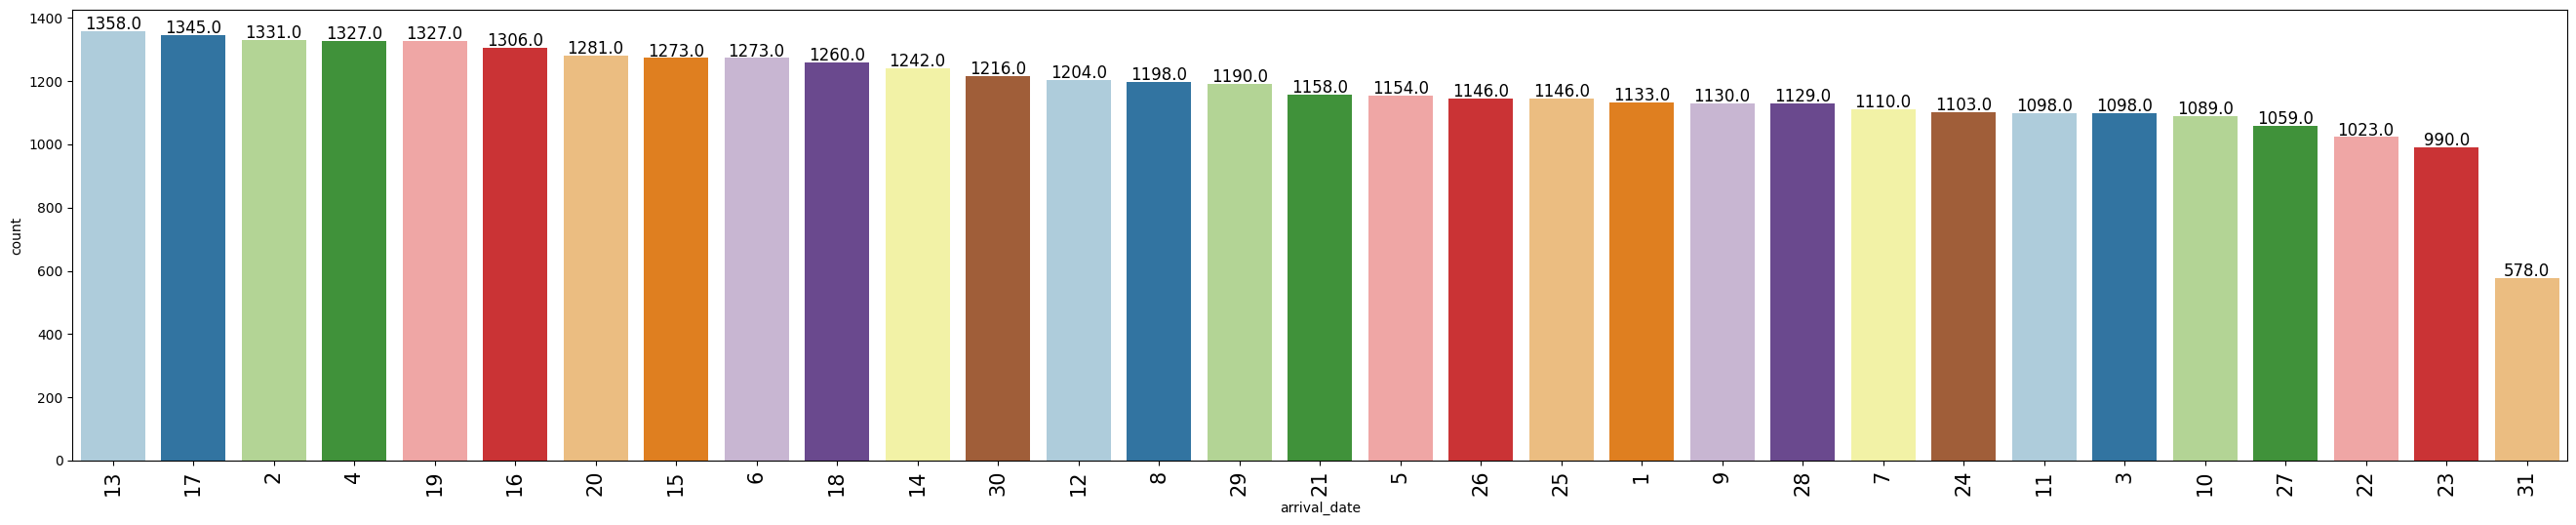

In [ ]:
labeled_barplot(df,'arrival_date')

## Observation
#### Majority  of the guests arrived on the 13th day of the month and closely followed by the 17th day of the month. However, the least number of the guests arrived on the 31st day of the month. Infact, it appears the most guests prefer to arrive the hotel around the middle of the month whereas towards the end of the month, the number of the guests slightly reduces. Further investigation may have to be carried out to know why the descripancy

## Distribution of the market segment

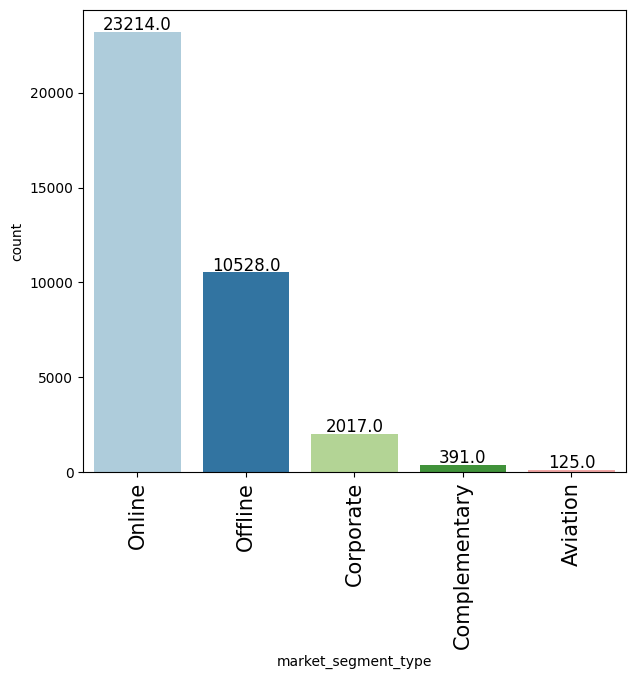

In [ ]:
labeled_barplot(df,'market_segment_type')

In [ ]:
df['market_segment_type'].value_counts(normalize= True)

market_segment_type
Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: proportion, dtype: float64

## Observation
#### It will be observed that the online market segment has the highest share (64%) of the market segments closely followed by the offline segment with about 29% of all the bookings. The aviation had the lowest percentage of the market segments. It appears that the guest prefer to make their bookings via online platforms therefore further investments in online infrastures will probably boost the number of bookings and overall earnings for the company.

## Distribution of the special requests


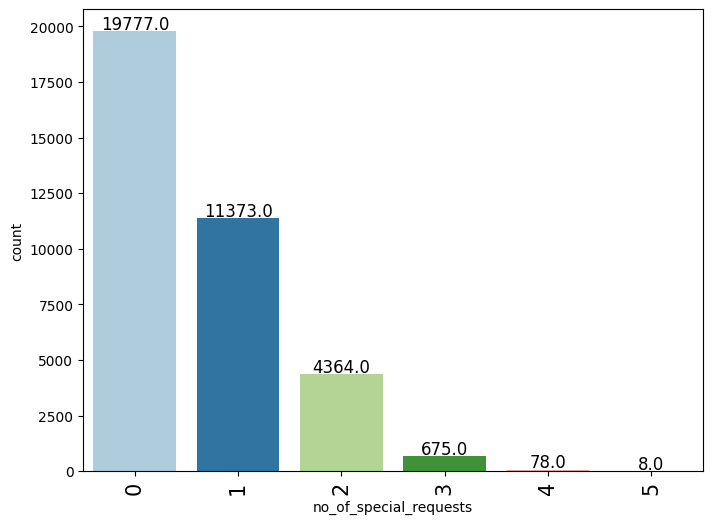

In [ ]:
labeled_barplot(df,'no_of_special_requests')

In [ ]:
df['no_of_special_requests'].value_counts(normalize= True)

no_of_special_requests
0   0.54520
1   0.31352
2   0.12030
3   0.01861
4   0.00215
5   0.00022
Name: proportion, dtype: float64

## Observation
#### Majority of the guests (55%) did not place any special requests whereas about 31% and 12% of the guest placed 1 special request and 2 special requests respectively. Only very few number of guests placed 3 special requests and above.

## Distribution of the booking status


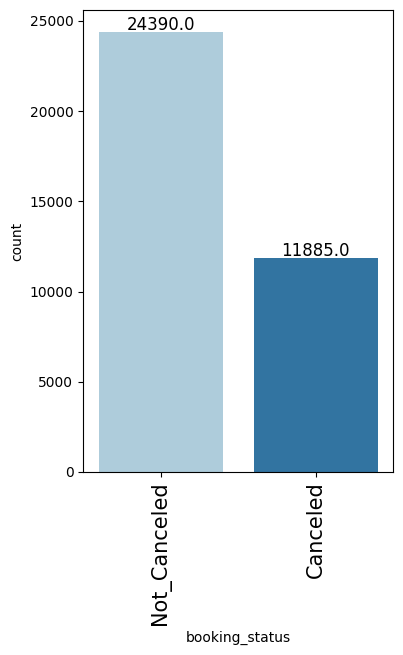

In [ ]:
labeled_barplot(df,'booking_status')

In [ ]:
df['booking_status'].value_counts(normalize= True)

booking_status
Not_Canceled   0.67236
Canceled       0.32764
Name: proportion, dtype: float64

## Observation
#### It will be noticed that 67% of the bookings which constitutes the majority were not canceled while about 37% of the bookings were canceled.

## Bivariate Analysis

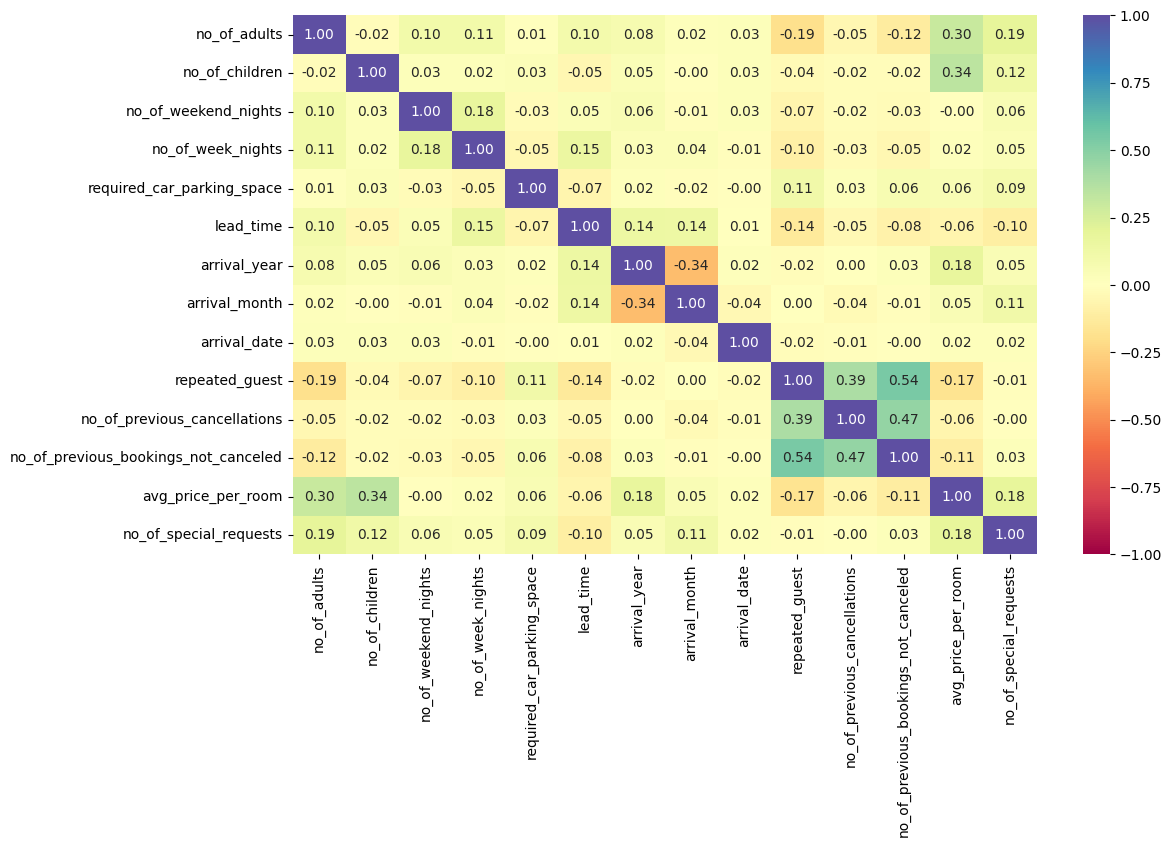

In [ ]:
# These lines of commands will create a list of columns containing numerical data and also generate the heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


## Observation
#### It appears that there are no significant correlations among the predictor variables therefore we expect to have low multicollinearity among them.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# A function that the category counts in both the predictor and target data and then plot the stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Observing the variation in average price of a room across the market segments

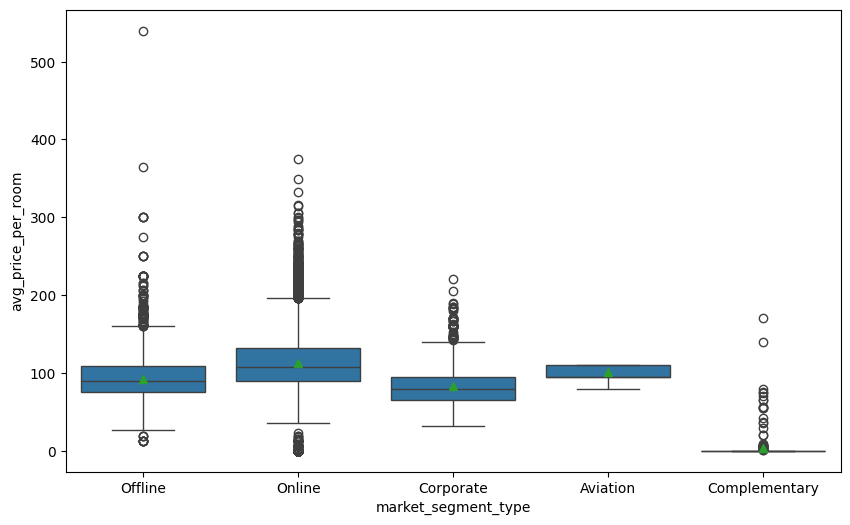

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", showmeans = True
)
plt.show()

## Observation
#### It will be observed that the Online market segment had the highest mean and median average price per room closely followed by the Offline market segment. The complementary market segment had the lowest mean and median averaged price for a room.

## Relationship between number of special requests and the average price of a room

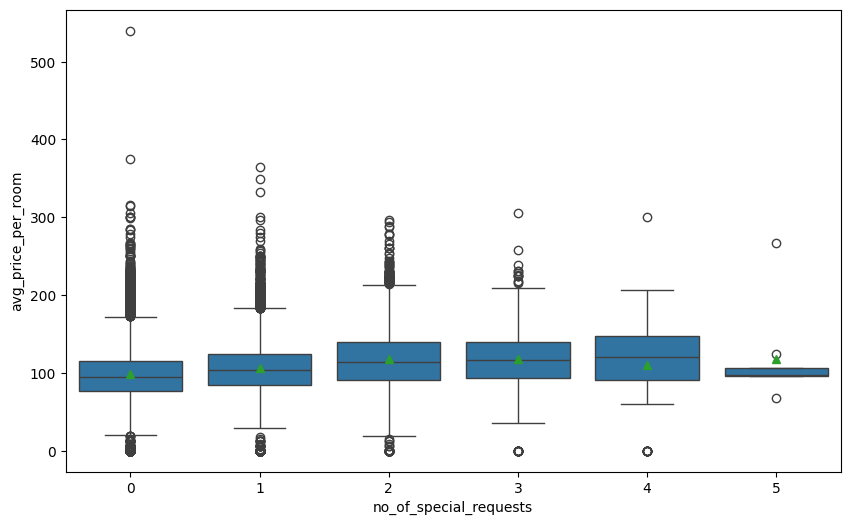

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", showmeans = True
)
plt.show()

## Observation
#### It can be seen that as the number of special requests by the guests increases, both the median and the mean of the averaged price per room increases which is quite expected.

## Relationship between the booking status and the average price per room

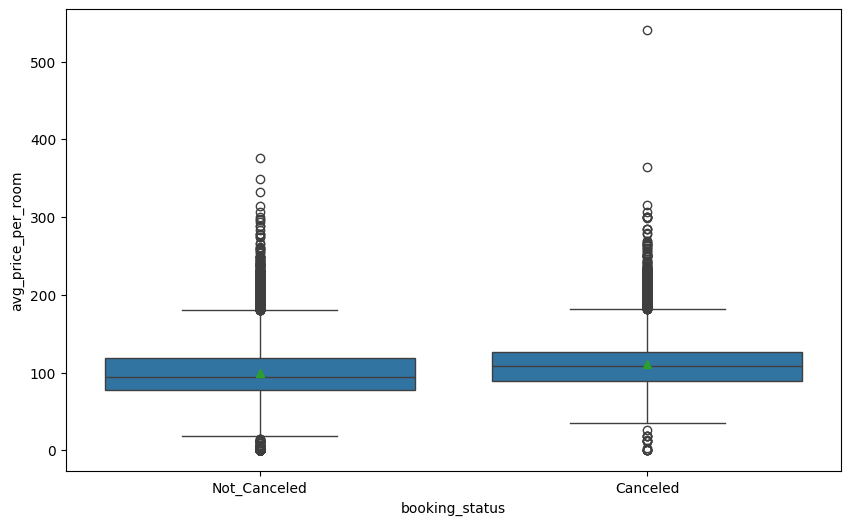

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="booking_status", y="avg_price_per_room", showmeans = True
)
plt.show()

## Observation
#### It will be noticed that the bookings that were canceled had a slightly higher average price per room compared to the prices of the bookings that were not canceled. Probably the cost of the  rooms might affect the clients decision to cancel or not however this needs to be investigated further.

## Relationship between the market segment and the booking status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


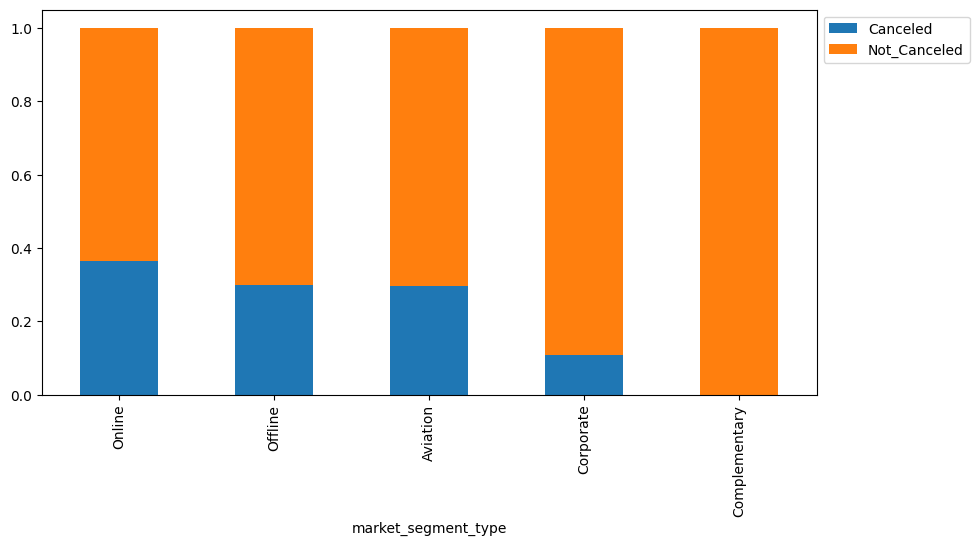

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

## Observation
#### It will be noticed that the Online market segment had the highest canceled bookings closely followed by the Offline and Aviation market segments. The Complementary market segment had the no booking canceled.

## Relationship between the booking status and the number of special requirements.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


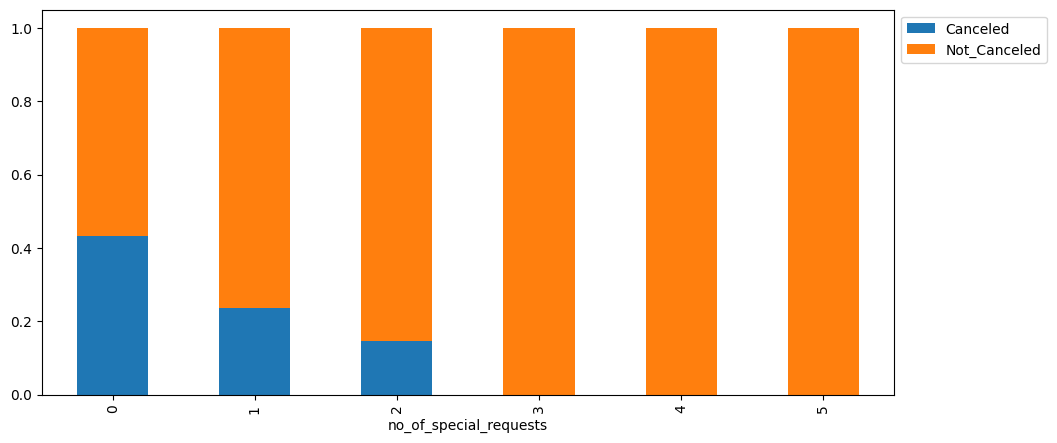

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

## Observation
#### It will be observed that the bookings with no special requirement had the highest cancelations and the number of cancelations decreases as the number of special requiremnts increases. In fact starting from when the number of requirements was  three (3), there were no cancelations recorded.

## Relationship between the average price per room and the booking status with and without outliers

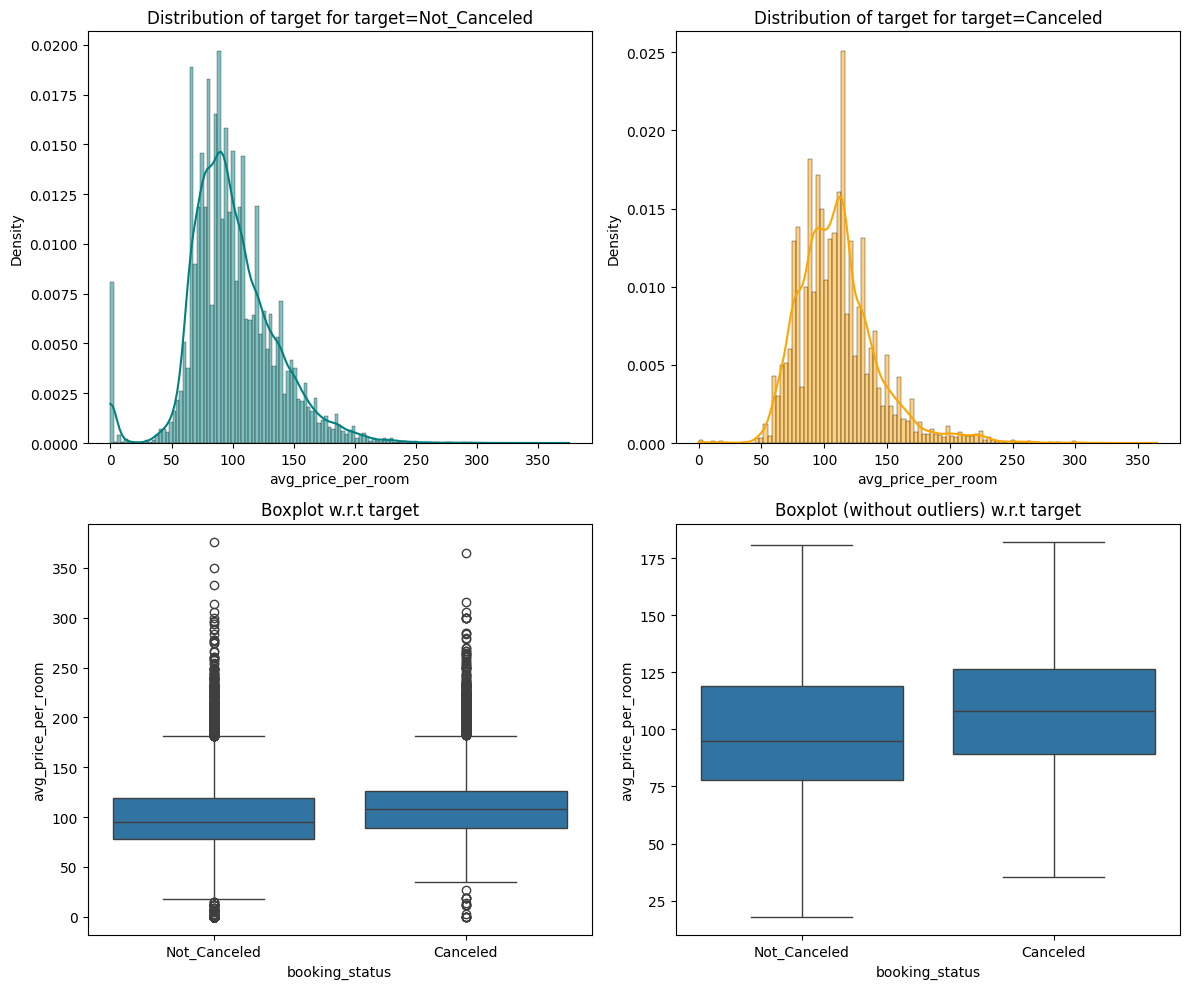

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

## Observation
#### It will be clearly seen that the bookings that got cancelled had a higher averaged price per room comparedd with those that were not canceled.


## Relationship between booking status and lead time

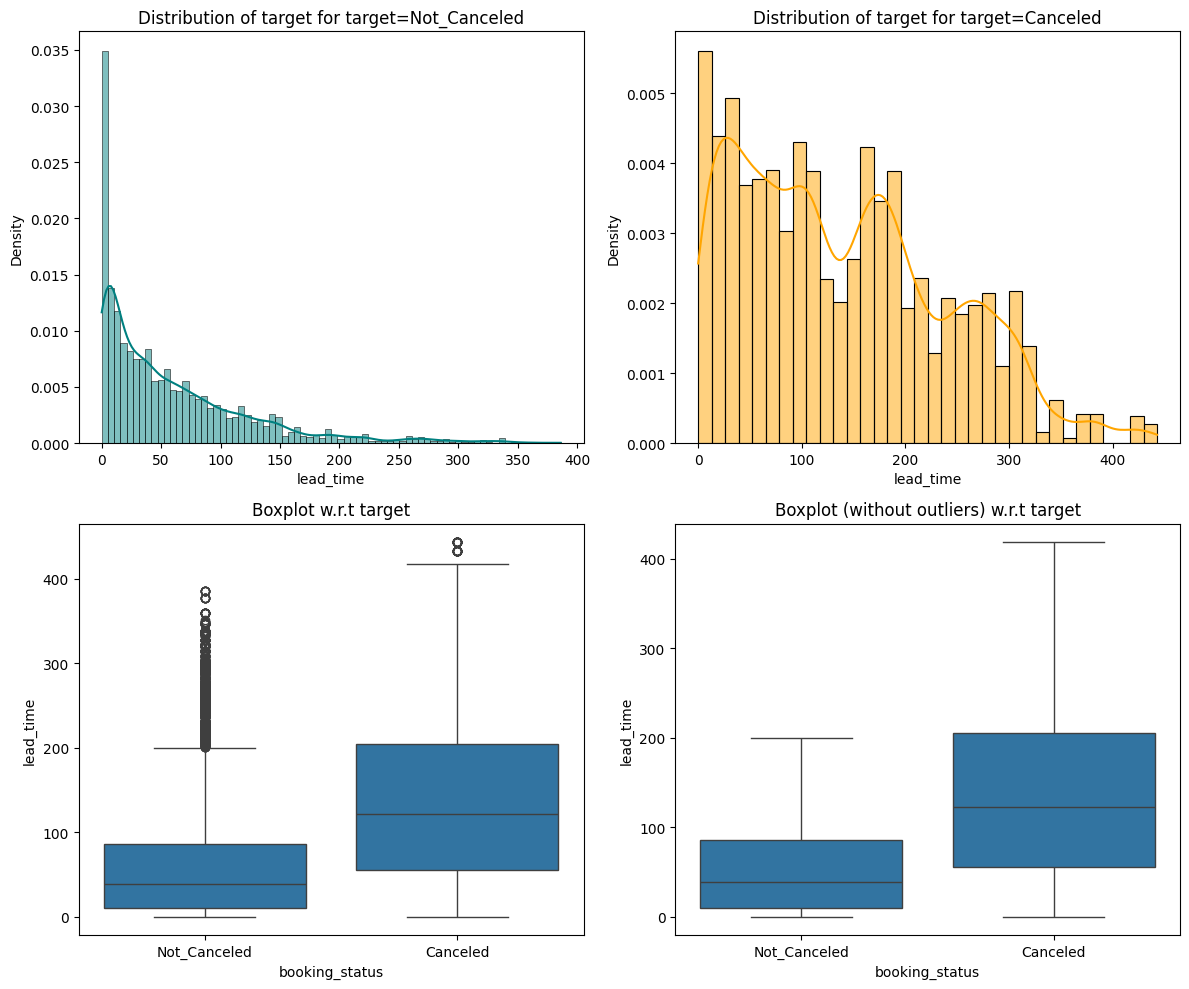

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

## Observation
#### It will be noted that bookings with higher lead times (median of about 130 days) had the highest cancelations compared to those with lower lead times (meadian of about 50 days)

## Creating a new data from containing families who travel with their children and determines its impact on the booking status

In [ ]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)] # This code gives the number of families who travelled with theirchildren
print(family_data.shape[0])
family_perc = round(family_data.shape[0]/df.shape[0] *100,2)
print(family_perc,'%')


28441
78.4 %


## Observation
#### It will be noted about 78% of the entire bookings consist of couples or partners who travelled with at least a child.

In [ ]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)
type(family_data["no_of_family_members"])

pandas.core.series.Series

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            5            10     15
11                           1             0      1
12                           0             1      1
------------------------------------------------------------------------------------------------------------------------


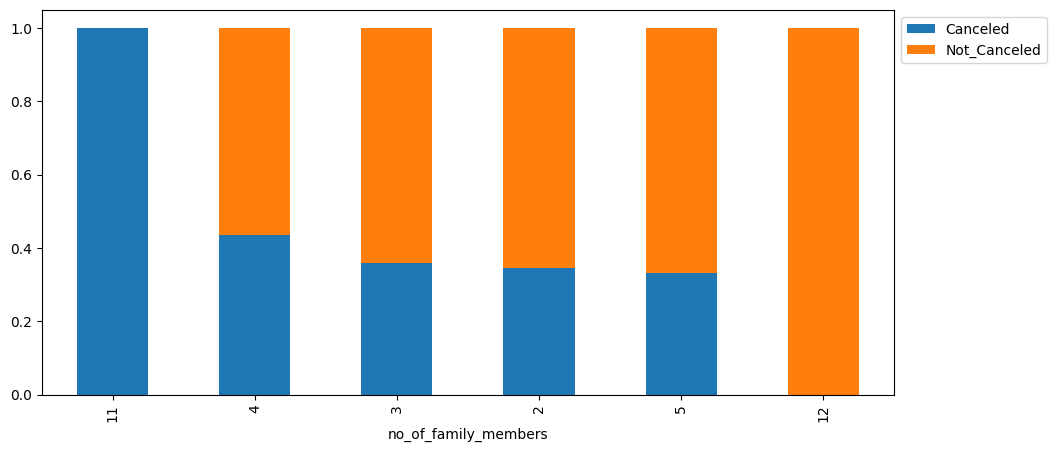

In [ ]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

## Observation
#### It will be observed that as the number of family members increases, the number of cancelations reduces. In fact, it will be noted that the highest number of cancelation came from a family that travelled with no children and a family of 12 did not cancel their booking.

## Determining the number of customers who stayed for more than a day and how that affects the booking status

In [ ]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape[0]
# Code to create a new dataframe consisting of customers that spent more than a day in the hotel

17094

## Observation
#### From all the bookings made, it will be observed that 17,094 stayed for more than a day.

In [ ]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])
# Code to create  a new column called the total_days which is a sum of the week nights and weekend nights spent by the customer

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                 6115         10979  17094
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
2                    639          1301   1940
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4             1      5
18                     3          

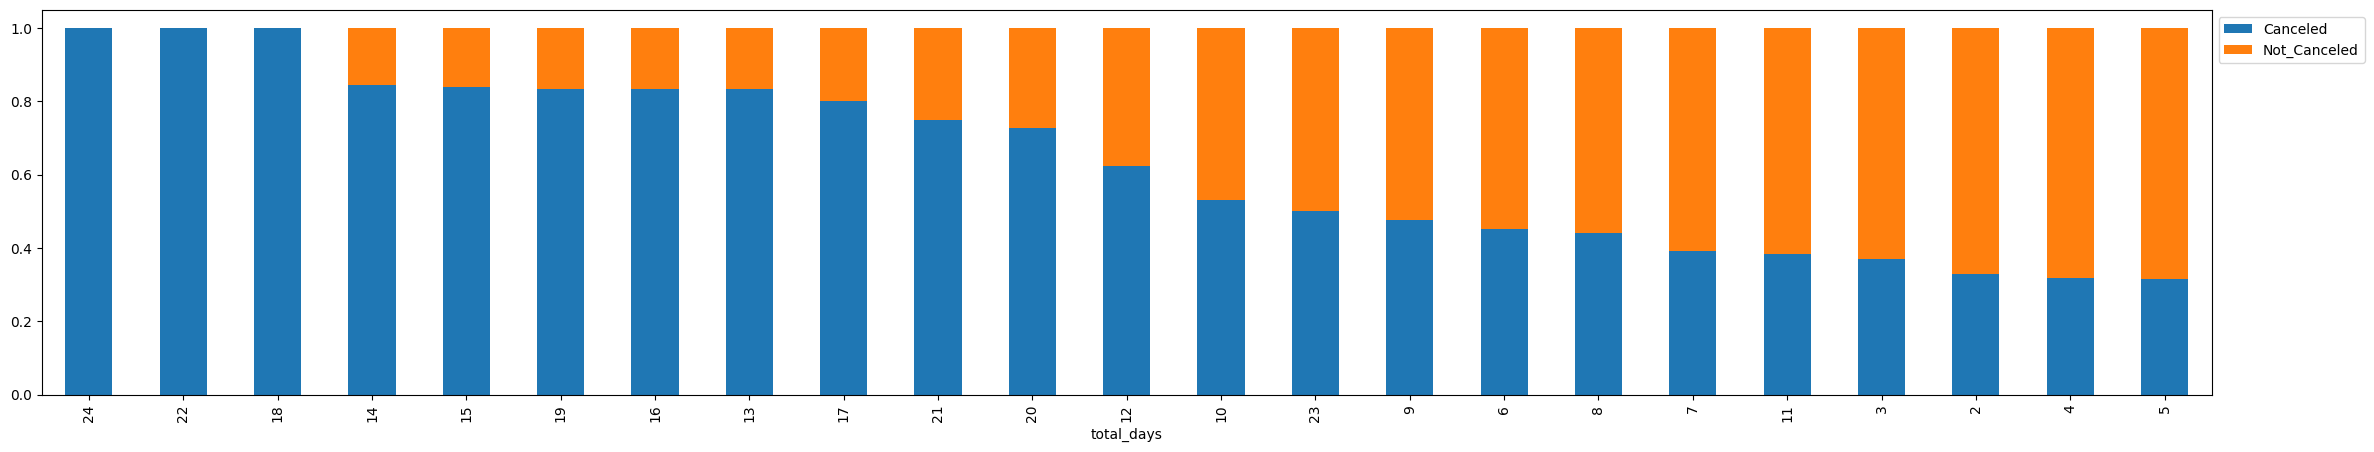

In [ ]:
stacked_barplot(stay_data, "total_days", "booking_status")

## Observation
#### It will be noted generally that as the number of days spent by the customers increases, the rate of cancelations decreases. The highest rate of cancelations were made when the number of days were 3,4 and 5 respectively. However, for customers who stayed from 20 days and above, the rate of cancelations dropped drasctically.

## Determining the relationship between the repeating guests and the booking status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


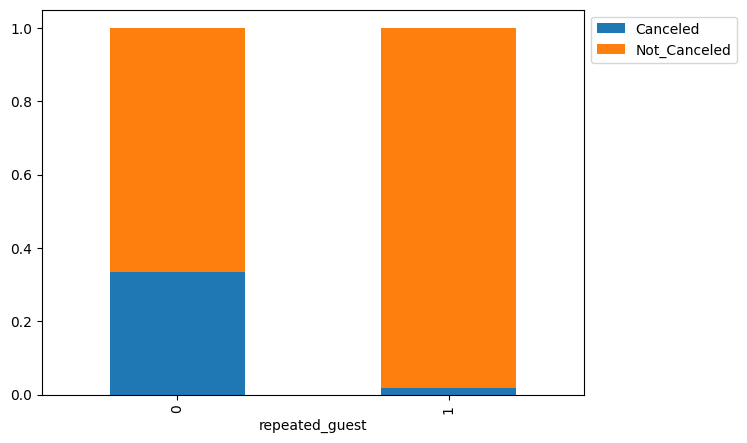

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

## Observation
#### It will be observed that out of the 930 repeated guests, only 16 canceled their booking which is significantly lower that the 11,869 cancelations out of the 35,345 non-repeated guests. This goes to show that repeated guests are very critical in driving the revenue of the company and therefore incentives should be put in place to convert significant number of the non-repeated guests to repeated guests.

## Determining the busiest month in the year


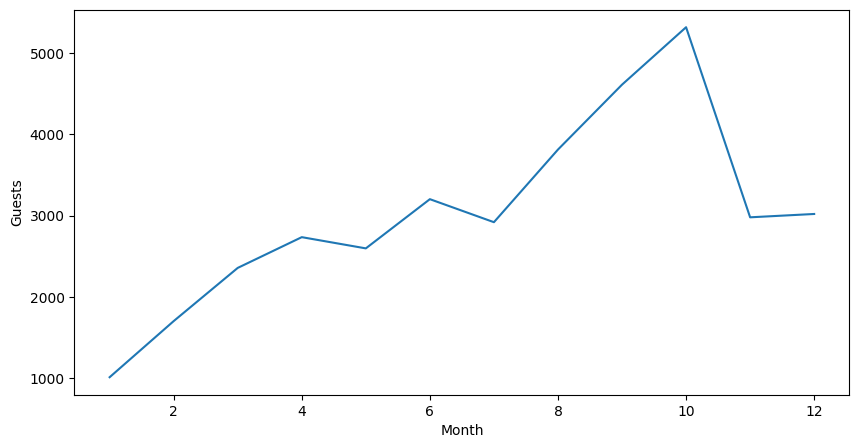

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

## Observation
#### It will be noted that the number of guest increases from the beginning of the year and reached a maximum in the month of October and then drastically dropped in the months of November and December. Apparently, it seemed the peak corresponds to probably the period where students are on break and probably the weather is good, hence the large number of people travelling for holidays or other purposes.

## Determining the number of cancelations in each month

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


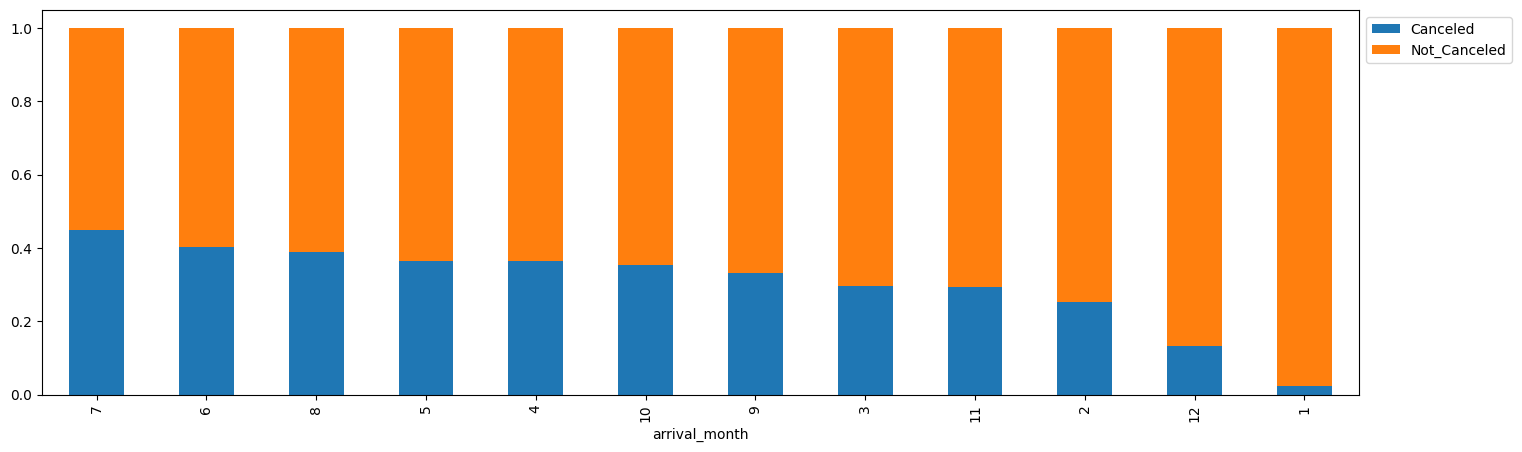

In [ ]:
stacked_barplot(df, "arrival_month", "booking_status")

## Observations
#### The months of July, June and August had the highest cancelations in that order while the month of January, December and February had the lowest cancelations in that order.

## Determining the variation of the average price per room across the different months.

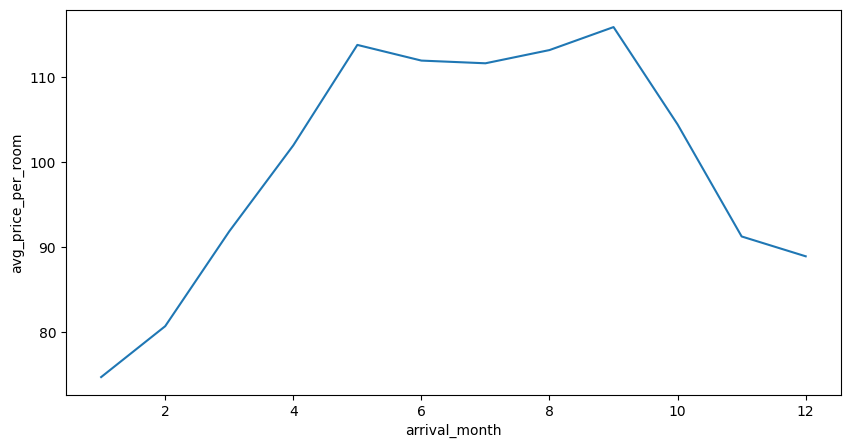

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room", ci = None)
plt.show()

## Observation
#### It will be observed that the average price for a room increases gradually from January up till May where it peaked and remained faily constant till September and beyond that it gradually decreased till December. It should also be noted that the highest number of booking cancelations happened within the months where the average price per room was the high and this could probably be one of the reason for the cancelations although further checks needs to be done to confirm this.

## Data Preprocessing

#### - Checking for outliers in the data

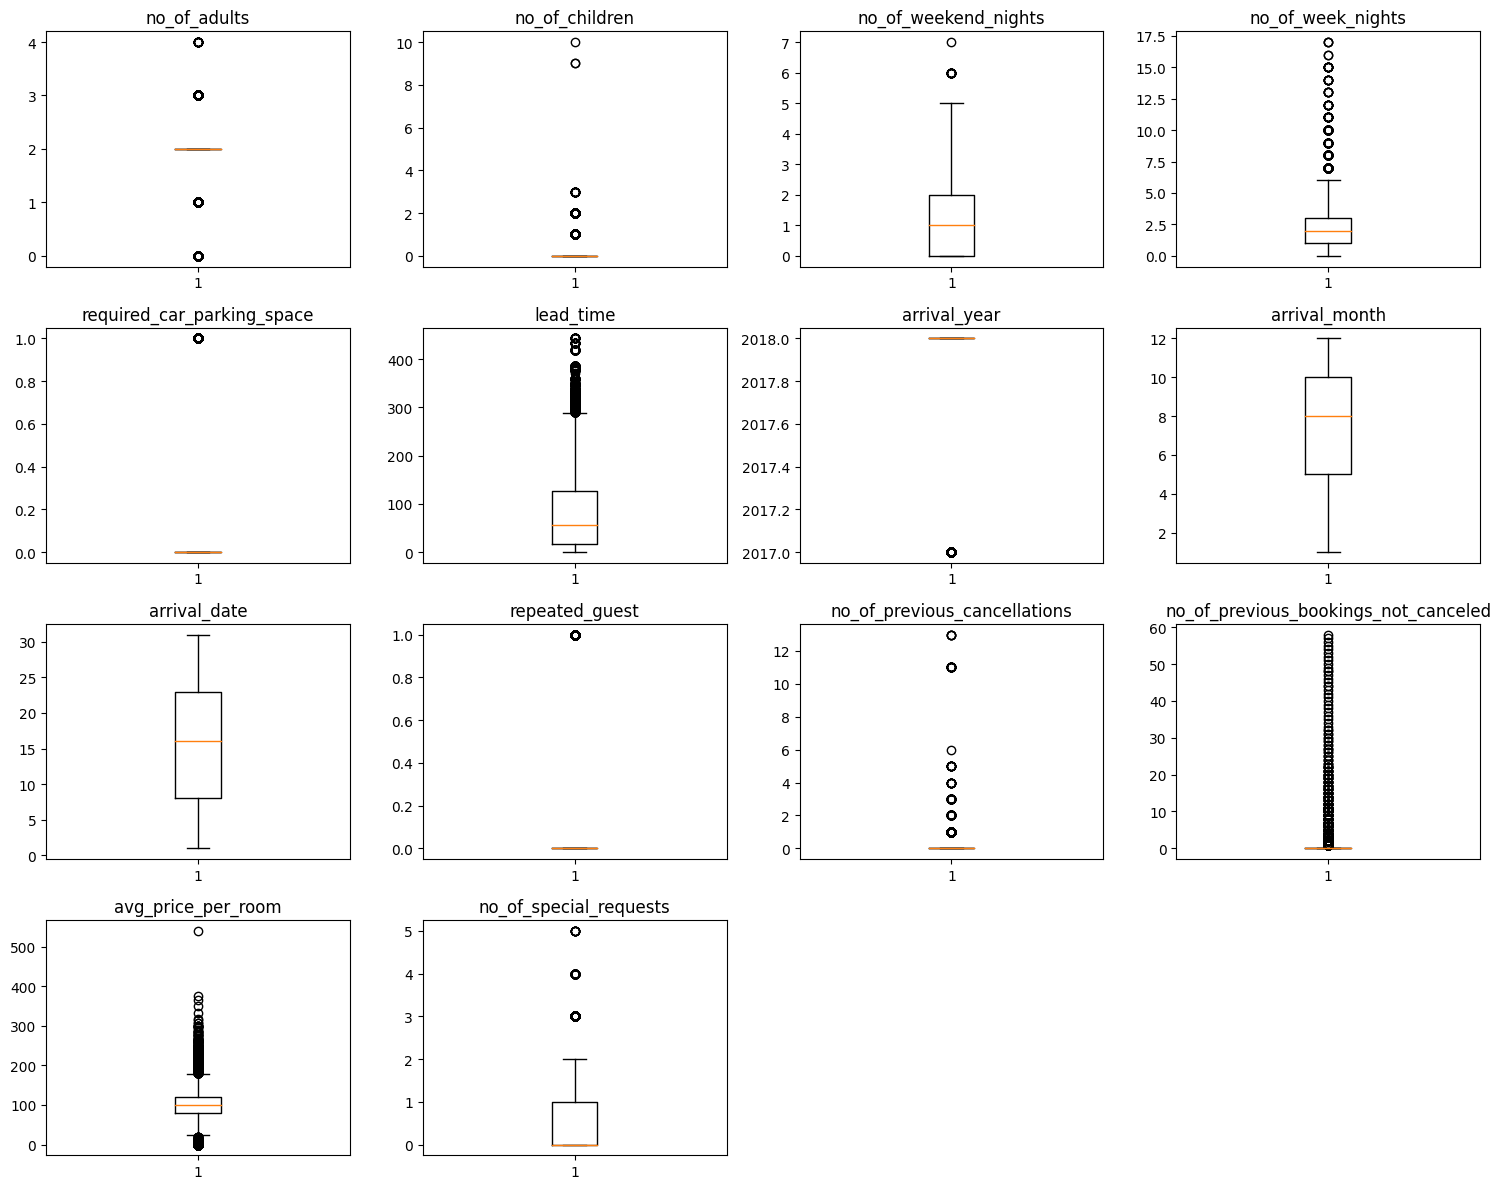

In [17]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations
#### It should be noted that all the numerical variables have outliers except the arrival month and arrival date that do not have outliers. It can be assumed that the presence of these outliers reflects the true nature of the data, hence no further outliers treatment will be undertaken.

## Model Building

### Model Evaluation Criteria

#### In the process of making predictions, errors could be introduced which manifest in terms of descripancy between the predicted and actual outcomes.

#### The two ways the predictions could go wrong are:
#### 1. The model could predict that a customer will cancel his/her booking, but actually the customer did not cancel the booking.

#### 2. The model could predict that the customer will not cancel the booking but in actual fact, the customer did cancel the booking.

#### In looking at these two prediction outcomes, both will cost the company some money or reputation. For instance, in the first case, if the customer did not cancel the booking when the model predicted booking cancelation, it implies that the hotel may not make adequate arrangement in terms of room preparation and other conveniences which upon arrival of the customer, the reputation and brand name of the hotel will be at stake.

#### On the other hand, if the customer cancels the booking when the model predicted otherwise, it means the hotel will loose some money in paying for staff to put the room in other and other ancillary cost.

#### In this instace, the scoring metrics to use is the F1-score which minimizes the False Positives (FP) and False Negatives (FN) which is what we desire. Hence the higher the F1 score, the better the model.

## Creating the function that will calculate the different metrics and also plot the confusion matrix.

In [18]:
 #defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [19]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel library)

### Data preparation for Logistic Regression

In [22]:
df.drop(["Booking_ID"], axis=1, inplace=True)

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [23]:
X = df.drop(["booking_status"], axis=1) # Predictor variables
y = df["booking_status"]


# adding constant
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [24]:
X_train = X_train.astype(float)

In [25]:
X_test = X_test.astype(float)

In [26]:
y_train = y_train.map({"Canceled": 1, "Not_Canceled": 0})

In [27]:
y_test = y_test.map({"Canceled": 1, "Not_Canceled": 0})

In [28]:
y_train.head()

13662    1
26641    0
17835    0
21485    1
5670     1
Name: booking_status, dtype: int64

In [29]:
y_test.head()

30392    0
6685     1
8369     0
2055     0
10969    1
Name: booking_status, dtype: int64

In [30]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Observation
#### It should be noted that the proportion of the canceled and Not-Canceled bookings in both the Train and Test data are the same.

## Model Building using Statsmodel

In [31]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3293
Time:                        21:14:06   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Observation
#### There are negative values among the coefficients which indicates that the probability of a booking cancelation increases with the decrease in the corresponding attribute value.

#### The positive values of the coefficient indicates that the probability of booking cancelation increases with increase in the corresponding attribute values.

#### The p-values also gives an indication if a given attribute is significant or not and given a significant level of 5% (0.05), it means that any attribute value with p-value less than 0.05 is significant in determining whether a given booking will be canceled.

## Model Performance Evaluation

In [32]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80604 0.63422    0.73975 0.68293

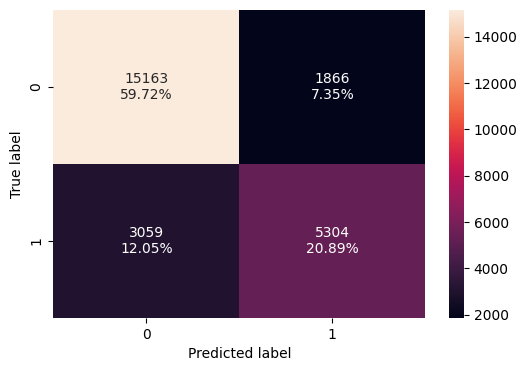

In [33]:
confusion_matrix_statsmodels(lg, X_train, y_train)

## Observation
#### The f1-score of the model is approximately 0.683 and attempt will be made to maximize this value to enhance predicitive power of the model.

#### The problem of multicollinearity may exist which will affect the p-values. Therefore variables with significantly high VIF value will be removed sequencially in order to have a reliable measure of the p-values.


In [34]:
# Checking the performance of the model on the test data

print("Test performance:")
model_performance_classification_statsmodels(lg, X_test, y_test)

Test performance:


Accuracy  Recall  Precision      F1
0   0.80493 0.63260    0.72882 0.67731

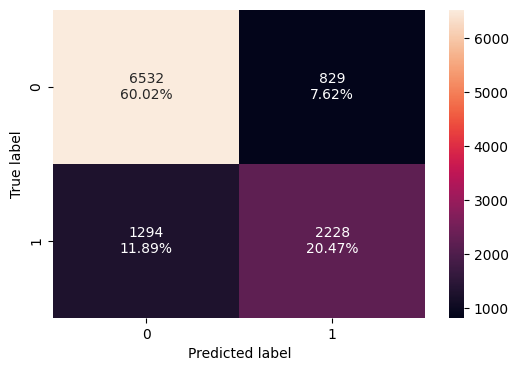

In [35]:
confusion_matrix_statsmodels(lg, X_test, y_test)

## Observation
#### On comparing the performance metrics of the model on both the training and test data, it will be noted that the model seem to generalize very well since the metrics are quite close. However, to improve the predictive power of the model, the f1-score will have to be maximized.

## Treating Multicollinearity

In [36]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [37]:
checking_vif(X_train)

feature            VIF
0                                  const 39468156.70600
1                           no_of_adults        1.34815
2                         no_of_children        1.97823
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09567
5             required_car_parking_space        1.03993
6                              lead_time        1.39491
7                           arrival_year        1.43083
8                          arrival_month        1.27567
9                           arrival_date        1.00674
10                        repeated_guest        1.78352
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65199
13                    avg_price_per_room        2.05042
14                no_of_special_requests        1.24728
15         type_of_meal_plan_Meal Plan 2        1.27185
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27218
18        room_type_reserved_Room_Type 2        1.10144
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36152
21        room_type_reserved_Room_Type 5        1.02781
22        room_type_reserved_Room_Type 6        1.97307
23        room_type_reserved_Room_Type 7        1.11512
24     market_segment_type_Complementary        4.50011
25         market_segment_type_Corporate       16.92844
26           market_segment_type_Offline       64.11392
27            market_segment_type_Online       71.17643

## Observation
#### It will be noted that most of the variables have very low VIF even among the hot-encoded variables which means that the problem of multicollinearity is very low among these variables which agrees with the information obtained from the heatmap. However for the hot-encoded variables such as market_segment_type_Corporate, market_segment_type_Offline and market_segment_type_Online, the VIF values are very high (17, 64 and 71 respectively). The variable with the highest VIF will be removed (i.e market_segment_type_Online)

In [38]:
#Code to drop the market_segment_type_Online variable
X_train1 = X_train.drop(["market_segment_type_Online"], axis=1)
X_test1 = X_test.drop(["market_segment_type_Online"], axis=1)

In [39]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3292
Time:                        21:14:54   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Checking the performance metrics of the new model

In [40]:
# Checking the performance of the new model on the training data
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80577 0.63374    0.73929 0.68246

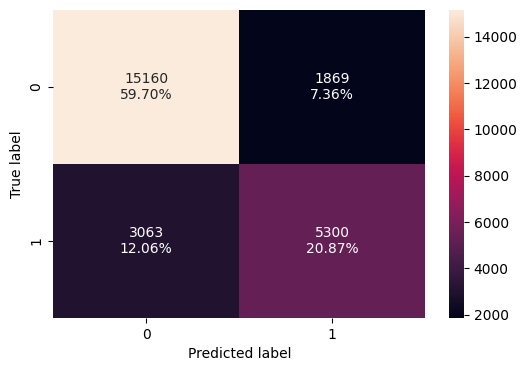

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [41]:
# Checking the performance of the new model on the test data
print("Test performance:")
model_performance_classification_statsmodels(lg1, X_test1, y_test)

Test performance:


Accuracy  Recall  Precision      F1
0   0.80437 0.63061    0.72844 0.67600

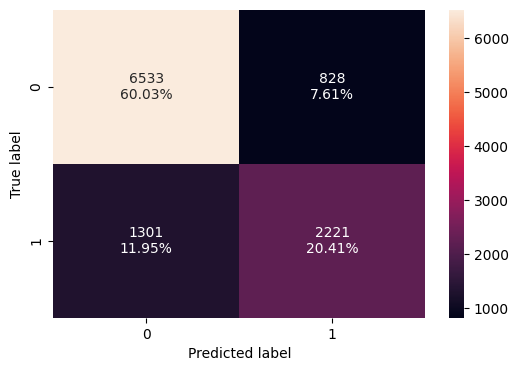

In [ ]:
# Building the confusion matrix of the test data
confusion_matrix_statsmodels(lg1, X_test1, y_test)

## Observation
#### Upon removing one of the variable with very high VIF, it will be observed that no significant change in the performance metrics of the models developed.

In [42]:
#Checking the VIF of all the predictor variables after the removal of one variable with the highest VIF
checking_vif(X_train1)

feature            VIF
0                                  const 39391371.31459
1                           no_of_adults        1.33178
2                         no_of_children        1.97735
3                   no_of_weekend_nights        1.06904
4                      no_of_week_nights        1.09512
5             required_car_parking_space        1.03979
6                              lead_time        1.39064
7                           arrival_year        1.42838
8                          arrival_month        1.27463
9                           arrival_date        1.00672
10                        repeated_guest        1.78019
11          no_of_previous_cancellations        1.39545
12  no_of_previous_bookings_not_canceled        1.65175
13                    avg_price_per_room        2.04959
14                no_of_special_requests        1.24242
15         type_of_meal_plan_Meal Plan 2        1.27150
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27039
18        room_type_reserved_Room_Type 2        1.10127
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.35600
21        room_type_reserved_Room_Type 5        1.02781
22        room_type_reserved_Room_Type 6        1.97273
23        room_type_reserved_Room_Type 7        1.11500
24     market_segment_type_Complementary        1.33825
25         market_segment_type_Corporate        1.52777
26           market_segment_type_Offline        1.59742

## Observation
#### It will be noted that all the variables had very low VIF, hence it can be safely assumed that the effect of multicollinearity should be neglected. At this point, the p-values will be considered to determine the variables that are significant (i.e those whose p-values are less than 0.05)

In [43]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3292
Time:                        21:15:22   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Observation
#### On looking at the p-values, it will be observed that arrival_date,no_of_previous_bookings_not_canceled,type_of_meal_plan_Meal Plan 3,room_type_reserved_Room_Type 3 and market_segment_type_Complementary  all have p-values > 0.05. Hence they can be dropped one after the other since they are not significant.

In [44]:
# A function to remove all the variables with p-values > 0.05
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [45]:
X_train2 = X_train1[selected_features]

In [46]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3283
Time:                        21:15:41   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

## Observation
#### Since none of the p-values of the current predictor variables are greater than 0.05, it then means that the current attributes (predictor variables) as the final one and lg2 as the final model.

#### It will be observed that some of the coefficients are negative (required_car_parking_space, arrival_month,repeated_guest,room_type_reserved_Room_Type 2, no_of_special_requests, market_segment_type_Corporate, room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 5, room_type_reserved_Room_Type 7 and market_segment_type_Offline) which implies an increase in their corresponding attributes will lead to a decrease in chances in  booking cancelation).

#### Similarly, some coefficients of the predicator variables are positive (no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time,arrival_year,no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2 andtype_of_meal_plan_Not Selected)  which implies that an increase in the corresponding attributes will lead an increase in the chances in booking camcelation.

## Converting coefficients to odds

In [47]:
odds = np.exp(lg2.params) # code to convert the coefficients to odds
# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11475         1.16436               1.11475   
Change_odd% -100.00000      11.47536        16.43601              11.47526   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04264                     0.20305    1.01584   
Change_odd%            4.26363                   -79.69523    1.58352   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57324        0.95853         0.06480   
Change_odd%      57.32351       -4.14725       -93.52026   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25716             1.01935   
Change_odd%                      25.71567             1.93479   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22994                        1.17992   
Change_odd%               -77.00595                       17.99156   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33089                         0.70046   
Change_odd%                        33.08924                       -29.95389   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75383                         0.47940   
Change_odd%                       -24.61701                       -52.05967   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38099                         0.23903   
Change_odd%                       -61.90093                       -76.09669   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45258                      0.16750  
Change_odd%                      -54.74162                    -83.24963

## Interpretation of some of the selected attributes

#### no_of_adults: keeping all other features constant a 1 unit change in no_of_adults will increase the odds of a person canceling the booking by ~1.11 times or a ~11.47% increase in odds ofcanceling the booking.

#### no_of_children: keeping all other features constant a 1 unit change in no_of_children will increase the odds of a person canceling the booking by ~1.16 times or a ~16.43% increase in odds ofcanceling the booking.
#### no_of_weekend_nights: keeping all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a person canceling the booking by ~1.11 times or a ~11.47% increase in odds ofcanceling the booking.
#### no_of_week_nights: keeping all other features constant a 1 unit change in no_of_week_nights will increase the odds of a person canceling the booking by ~1.04 times or a ~4.62% increase in odds ofcanceling the booking.
#### required_car_parking_space: keeping all other features constant a 1 unit change in required_car_parking_space will decrease the odds of a person canceling the booking by ~0.2 times or a ~79.7% decrease in odds ofcanceling the booking.
#### arrival_month: keeping all other features constant a 1 unit change in arrival_month will decrease the odds of a person canceling the booking by ~0.96 times or a ~4.14% decrease in odds ofcanceling the booking.
#### Similar method of interpretation can be applied to the remaining predictor variables.

## Checking the performance of the new model

### Training Set Performance

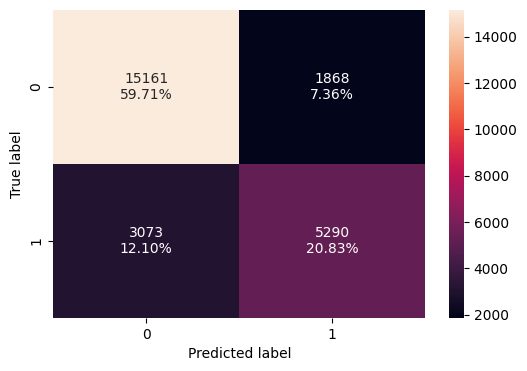

In [48]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [49]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80541 0.63255    0.73903 0.68166

### Test set performance
#### Similar columns that were dropped in the training data should equally be dropped in the test data.


In [50]:
X_test2 = X_test[list(X_train2.columns)]

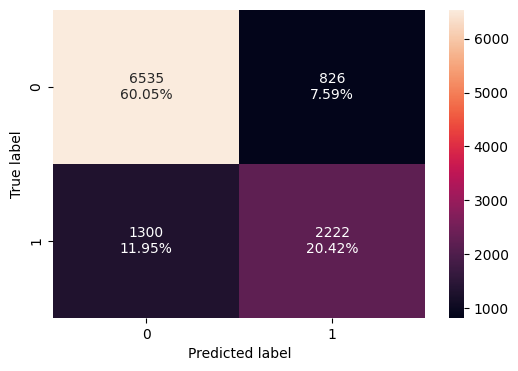

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [51]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

## Observation
#### The model is giving f-1 score of approximately 0.68 and 0.67 on both the train and test datasets and since thses values are close, it means that the model is generalizing well and not overfitting.

#### The f-1 score is not too encouraging and it can actually be improved upon in the subsequent sections.

## Model Performance Improvement

### ROC Curve and ROC-AUC

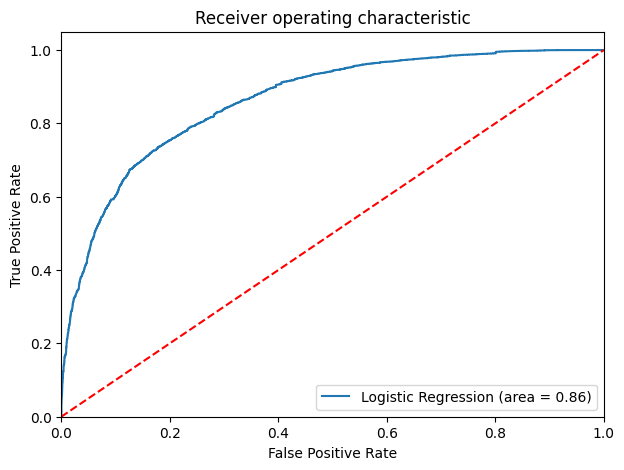

In [55]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Observation
#### It will be observed that the model gives a fair performance on the training datasets.

## Optimal threshold using AUC-ROC curve

In [56]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


## Checking model performance on training set

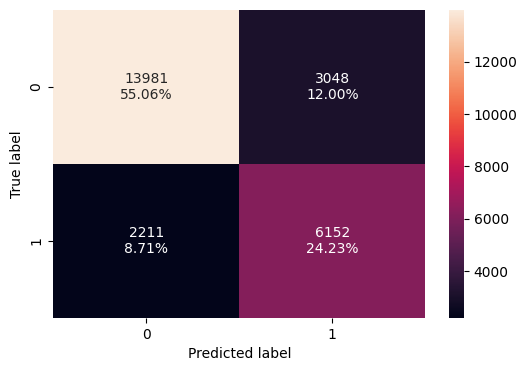

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [57]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79289 0.73562    0.66870 0.70056

#### It will be observed that F1 score of the new model had increased to 0.7 from 0.67 and 0.68 in previous models. The value of the Recall Metrics had also increased in this new model.

## Checking model performance on test datasets

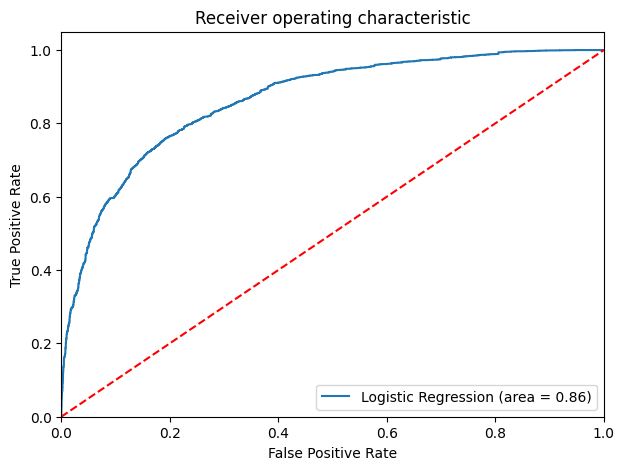

In [58]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

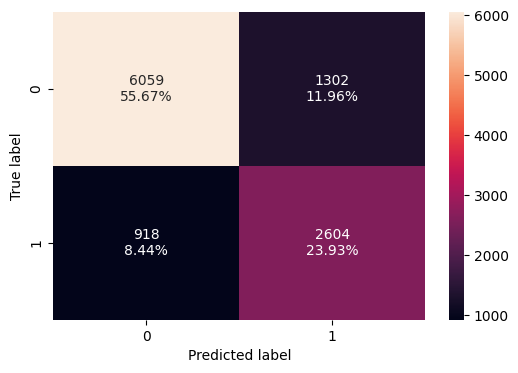

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [59]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79601 0.73935    0.66667 0.70113

#### The F1 score and Recall both improved in this model compared to the previous models.

## Precision - Recall Curve

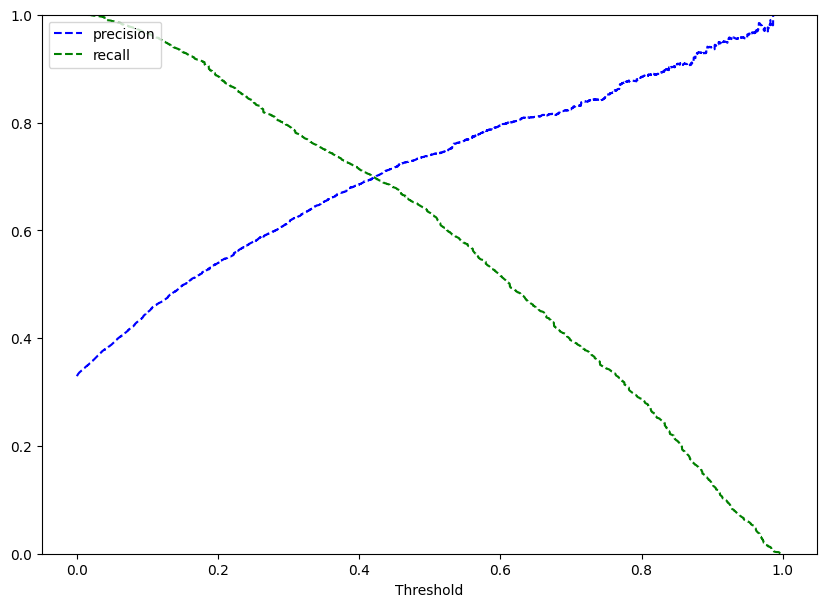

In [60]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

#### Approximately, at threshold of aout 0.48, the Recall and Precision are balance

In [61]:
# setting the threshold
optimal_threshold_curve = 0.48

## Checking model performance on training set

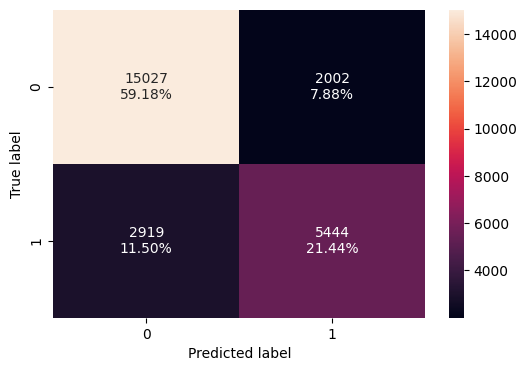

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [62]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80620 0.65096    0.73113 0.68872

## Observation
#### There seem to be no significant improvement on the model performance from the models used earlier.

## Checking the performance of the model on the test data

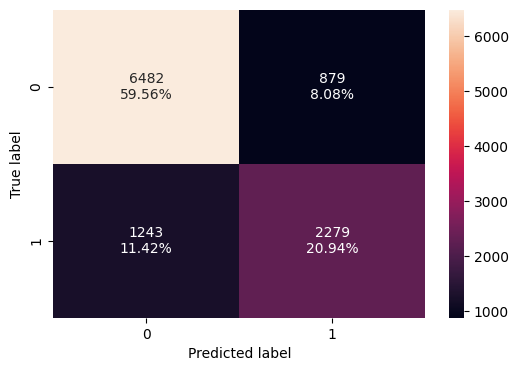

In [ ]:
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [63]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80502 0.64708    0.72166 0.68234

#### It will also be observed that there was no significant improvement in the performance of the model in terms of the F1 score and Precision on the test dataset when compared to the earlier tested models.

## Model Performance Comparison and Final model selection

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.48 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80541   
Recall                                         0.63255   
Precision                                      0.73903   
F1                                             0.68166   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73562   
Precision                             0.66870   
F1                                    0.70056   

           Logistic Regression-0.48 Threshold  
Accuracy                              0.80620  
Recall                                0.65096  
Precision                             0.73113  
F1                                    0.68872

In [65]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.48 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80465   
Recall                                         0.63089   
Precision                                      0.72900   
F1                                             0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79601   
Recall                                0.73935   
Precision                             0.66667   
F1                                    0.70113   

           Logistic Regression-0.48 Threshold  
Accuracy                              0.80502  
Recall                                0.64708  
Precision                             0.72166  
F1                                    0.68234

#### The three models developed performed relatively well on both the training and test datasets without overfitting. However, the model with the Threshold of 0.37 gave the best value of F1 score, hence it should be selected as the final and best model for now.

## Decision Tree

### Data Preparation for modeling using Decision Tree
#### The objective of building the model is to be able to predict which of the bookings will be canceled. In doing so, the categorical variables need to be encoded using numerical values and finally the data had to be splitted into training and testing data.

In [5]:
df = df.drop(["Booking_ID"], axis=1) # Booking ID column is a unique identifier and therefore needs to be dropped
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

## Encoding the training and test data

In [6]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.map({"Canceled": 1, "Not_Canceled": 0})
y_test = y_test.map({"Canceled": 1, "Not_Canceled": 0})

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
Not_Canceled   0.67064
Canceled       0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
Not_Canceled   0.67638
Canceled       0.32362
Name: proportion, dtype: float64


#### It should be noted that the proportion of the bookings that are canceled (33%) and not canceled (67%) are the same in both the training and test data.

## Model building (Decision Tree)

In [7]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Model performance metrics

In [8]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [9]:
# Function to build the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Checking the performance of the training dataset

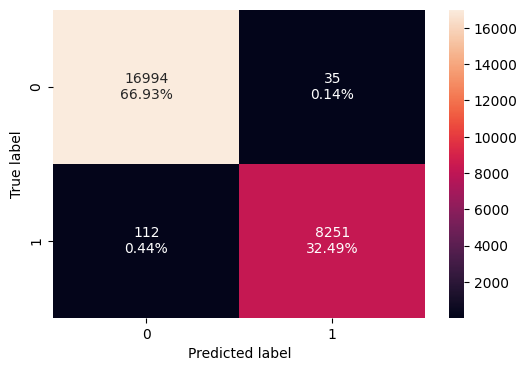

In [10]:
confusion_matrix_sklearn(model0, X_train, y_train) # Code to draw the confusion matrix

In [11]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

## Checking the performance metrics of the test dataset

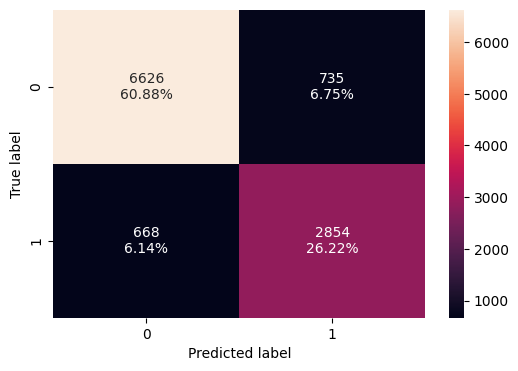

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test) # Code to draw the confusion matrix

In [12]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

## Observation
#### It will be noted that the performance metrics of the training dataset particularly the F1 score are significantly higher (more than 6-7 points) than the performance metrics of the test data, hence the model is not generalizing well due to overfitting. In order to improve the performance of the model, prunning techniques will be applied to minimize the overfitting.

#### Before prunning the tree, important features need to be checked.

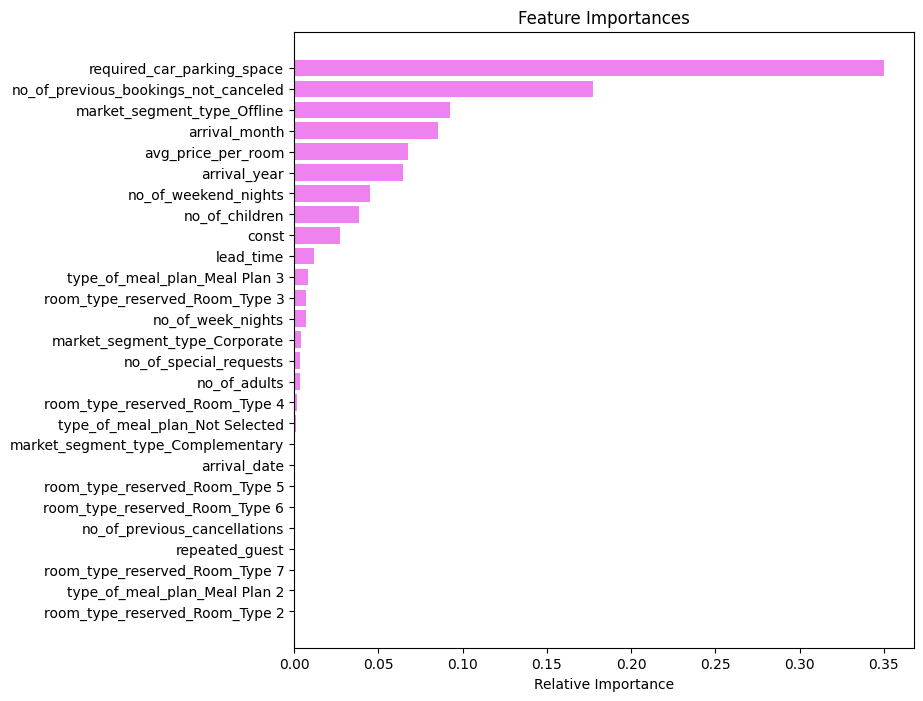

In [85]:
# Checking important features
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation
#### It will be noted that the lead_time is the most important feature in predicting if a booking will be canceled. Other important features includes avg_price_per_room, market_segment_type_online,arrival_date, no_of_special_requests,no_of_week_nights, arrival_month, no_of_weekend_nights and no_of_adults

## Decision Tree Pre-Prunning Technique

In [13]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### The best parameter combination that maximizes the F1 score includes class_weight='balanced', max_depth=6, max_leaf_nodes=50,min_samples_split=10, random_state=1


## Checking performance on training dataset

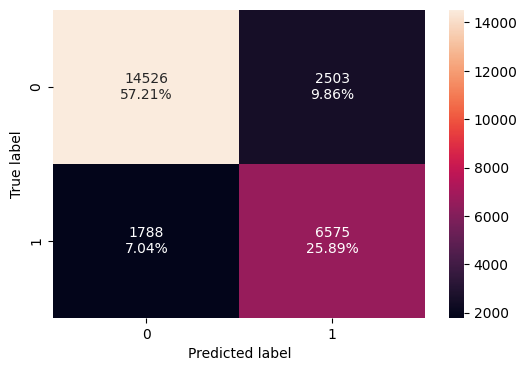

In [ ]:
#Code to generate the confusion matrix
confusion_matrix_sklearn(estimator, X_train, y_train)

In [14]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397

## Checking performance on the test dataset

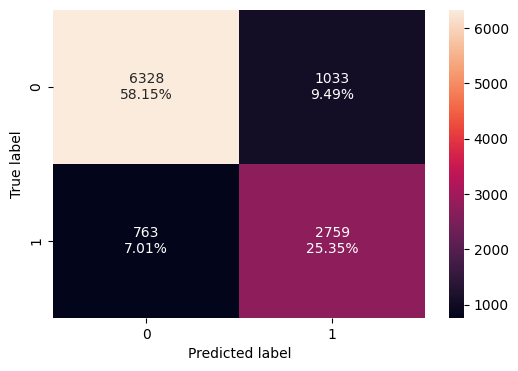

In [ ]:
#Code to generate the confusion matrix
confusion_matrix_sklearn(estimator, X_test, y_test)

In [15]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

## Observation
#### It will be observed that the F1 score in the training dataset   (0.75397) is very close to that of the test dataset (0.75444), therefore the model can be said to generalize well with minimal or no overfitting. The same applies to the other performance metrics too.

### Visualizing the decision tree

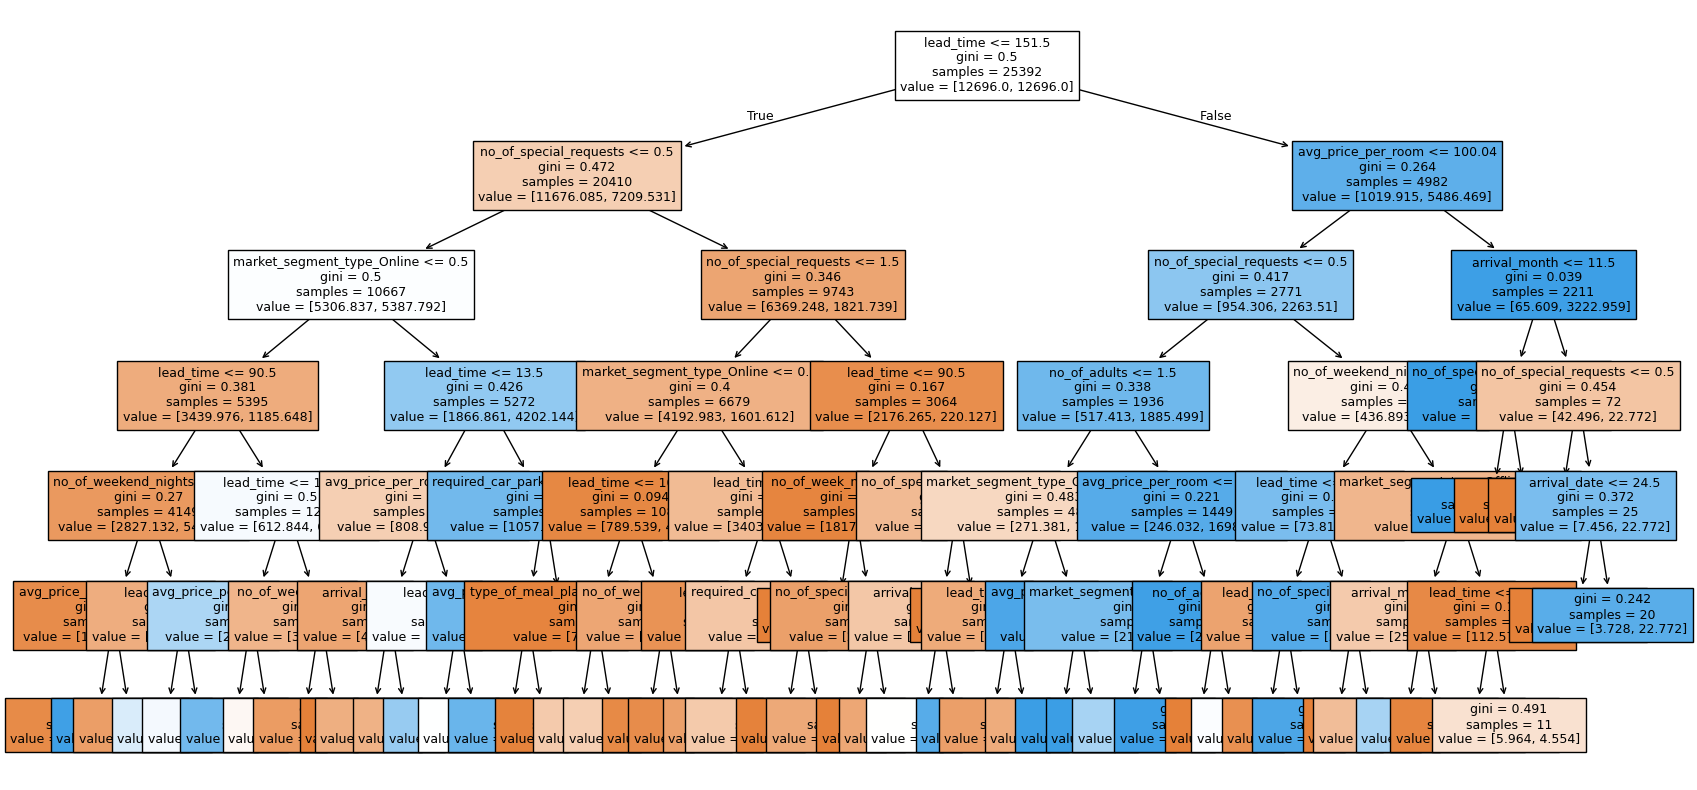

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

## Interpretation of the tree

####  If the lead_time <= 151.50, no_of_special_requests <= 0.50, market_segment_type_Online <= 0.50, lead_time <= 90.50, no_of_weekend_nights <= 0.50 and avg_price_per_room >  196.50, then the booking is more likely to be canceled.

#### This interpretation technique can be extended to other section of the tree

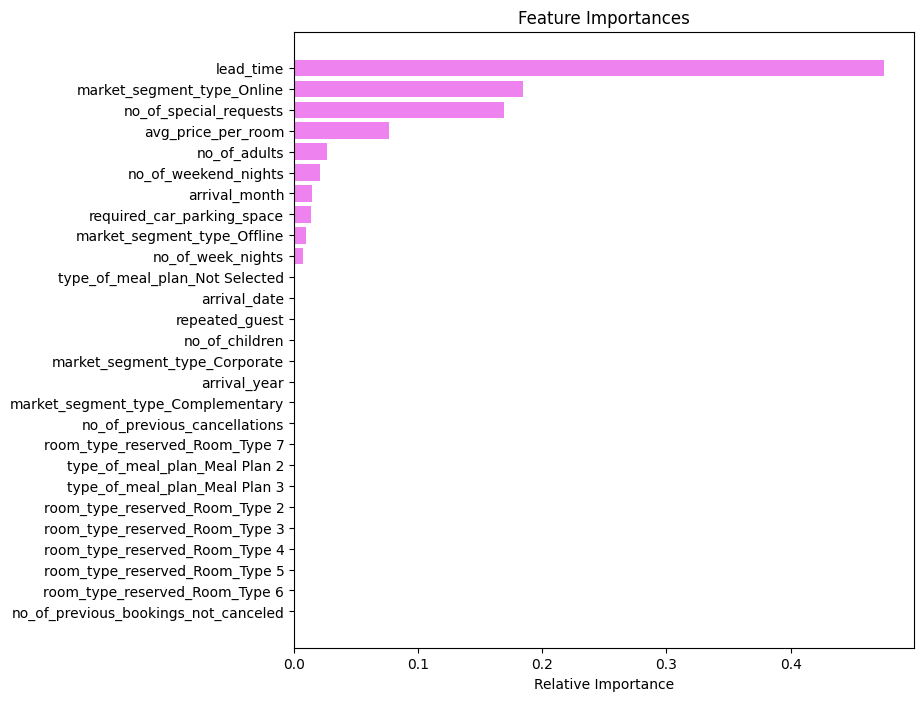

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation
#### It will be noted that after applying the pre-prunning technique on the tree, the feature_importance  of the model which are attributes that contributes the greatest in the model performance includes lead_time, market_segment_type_online, no_of_special_requests, avg_price_per_room, no_of_adults, no_of_weekend_nights, arrival_month, required_car_parking_space, market_segment_type_offline and no_of_week_nights in that order.

## Applying the Cost Complexity Technique

In [66]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [67]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

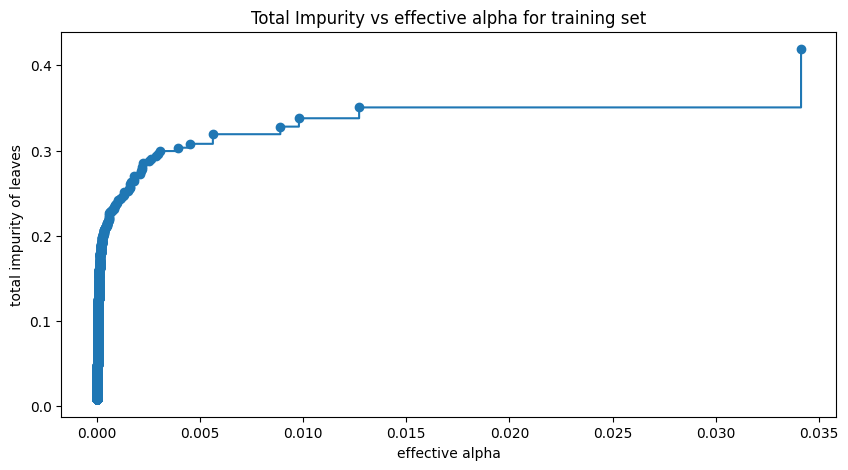

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

## Observation
#### It will be noted that the total impurity of leaves increases as the effective alpha increases, however at very low effective alpha, it remained close to a constant (0.00) as the total impurity of leaves increases  up to about 0.2. Beyond this point, there is a direct relationship between the total impurity of leaves and the effective alpha.

####Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [68]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases

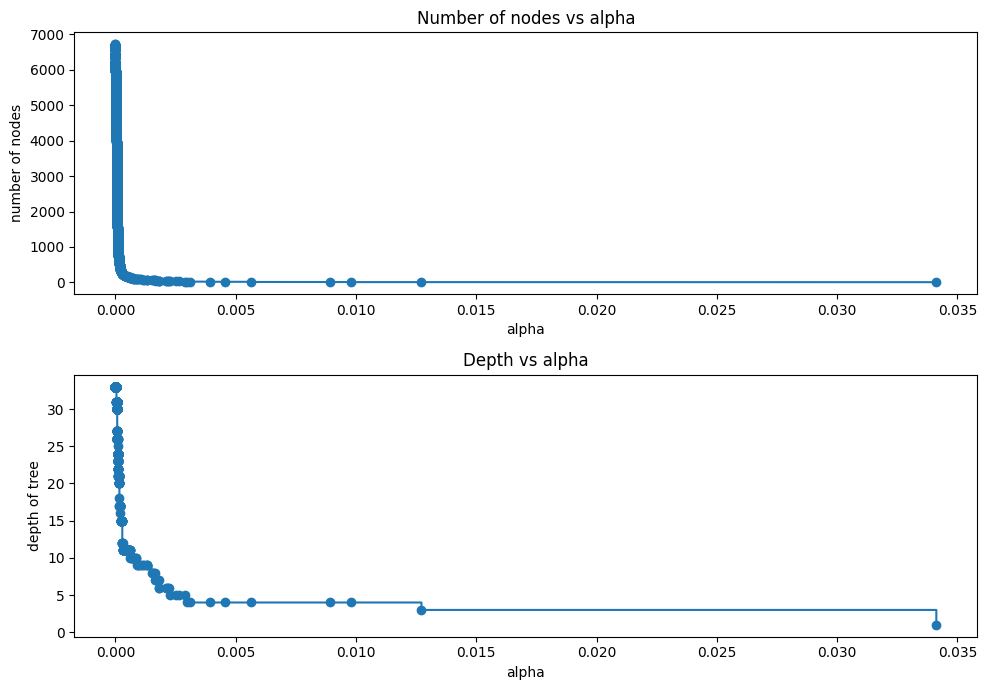

In [69]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [71]:
F1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    F1_train.append(values_train)

In [73]:
F1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    F1_test.append(values_test)

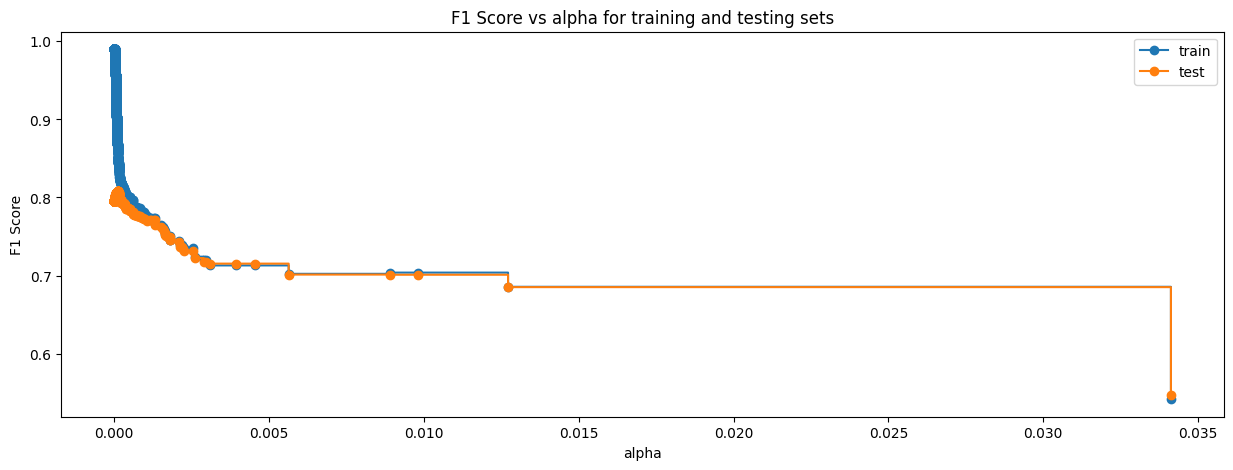

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, F1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, F1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [77]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(F1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167002,
                       class_weight='balanced', random_state=1)


## Checking performance on training set

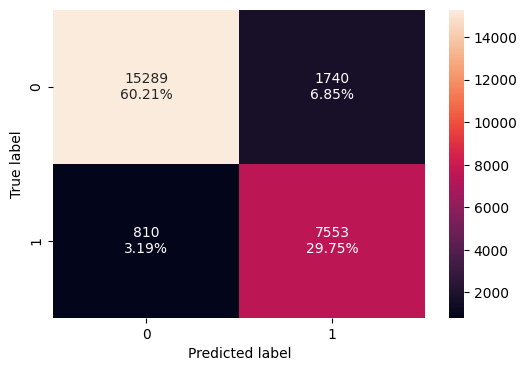

In [78]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [81]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89957 0.90314    0.81276 0.85557

## Checking performance on test set

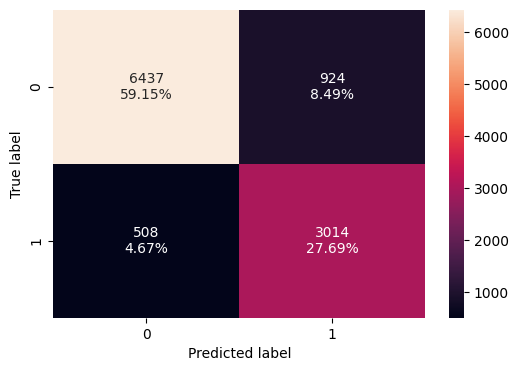

In [82]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [83]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86842 0.85576    0.76536 0.80804

#### On comparing the F1 score of the training data and test data, it can be observed that the metric is within 6 - 7 points, hence the model can be said to generalize fairly well even with unknown data without overfitting.

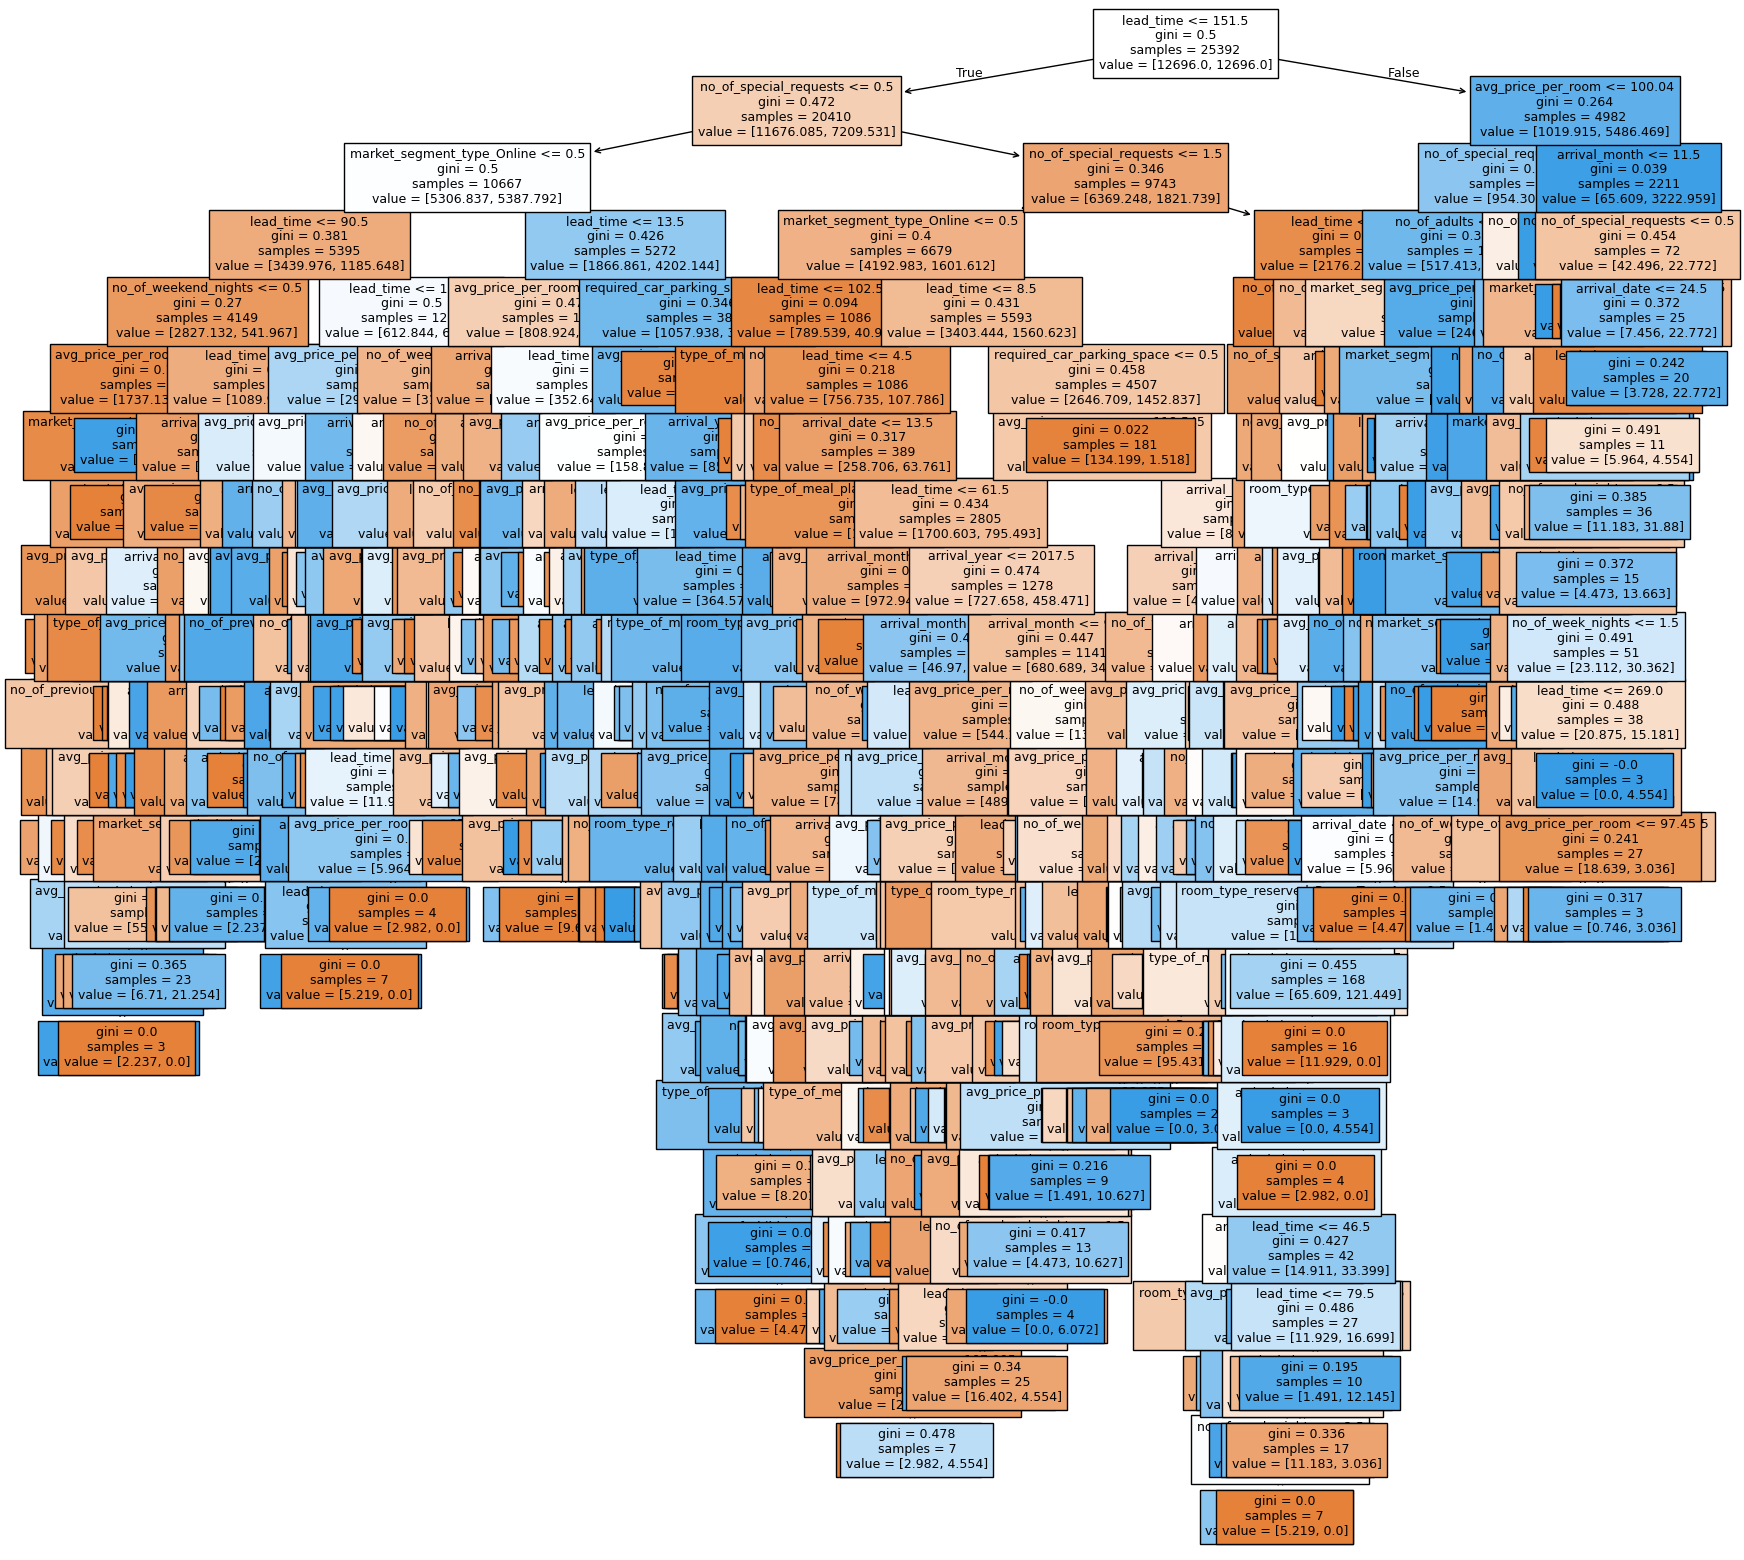

In [94]:

plt.show()
plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [89]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

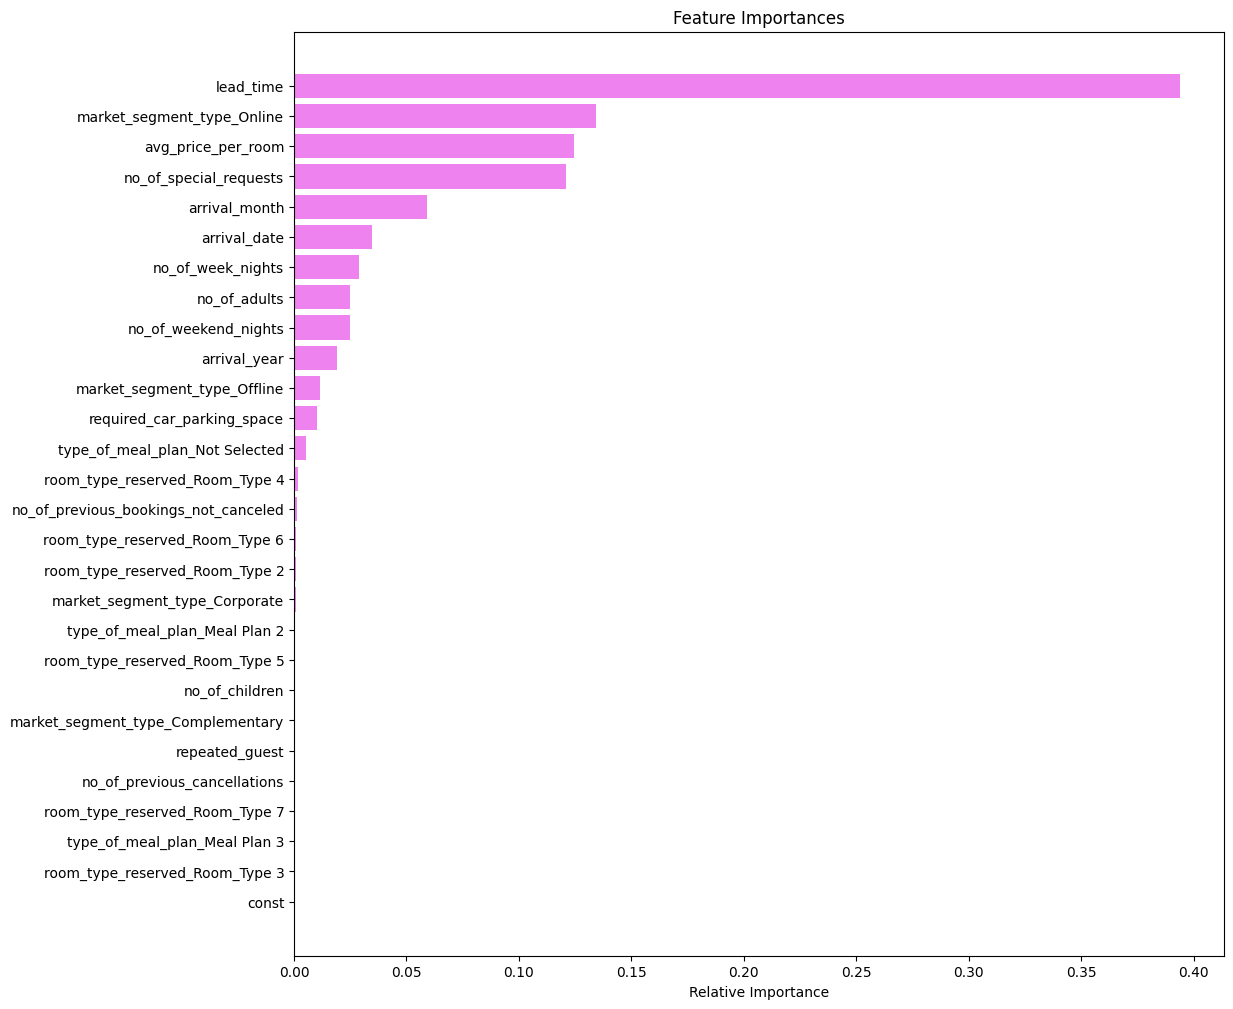

In [90]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation
#### It will be noted that the lead time,market_segment_type_online,avg_price_per_room, no_of_special_requests and arrival_month are the most important features in the post pruned tree.

## Comparing Decision Tree Models

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83101   
Recall                   0.98661                      0.78620   
Precision                0.99578                      0.72428   
F1                       0.99117                      0.75397   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89957  
Recall                          0.90314  
Precision                       0.81276  
F1                              0.85557

In [93]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87108                      0.83497   
Recall                   0.81034                      0.78336   
Precision                0.79521                      0.72758   
F1                       0.80270                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86842  
Recall                          0.85576  
Precision                       0.76536  
F1                              0.80804

## Observation
#### It will be observed that the Decision Tree Model without weight (sklearn) and that of Post-Pruning all gave a very high F1-score in both the training and test datasets, however, the Decision Tree Model with Post-Prunning will be selected as the best model because it gave a slightly higher F1-score.

## Conclusions and Recommendations
#### 1. It will be observed that about 47% of the bookings did not have weekend nights included. 28% and 25% of the bookings had 1 weekend night and 2 weekend nights respectively. Overall, it appears that most of the clients do not prefer booking and staying over night during the weekends, therefore incentives can be provided over the weekend to attract more clients to stay during weekend nights to boost revenue.

#### 2. It will be observed that the Online market segment had the highest mean and median average price per room closely followed by the Offline market segment. More targeted online adverts on multiple platforms can be adopted to boost revenue.

#### 3. The lead time is a major important variable that influences the prediction of whether a booking will be canceled according to the Decision Tree Model.It was observed also that bookings with higher lead times (median of about 130 days) had the highest cancelations compared to those with lower lead times (median of about 50 days). The company can adopt measures that will encourage the customers to shorten the time from booking to arrival through one form of incentive or the other.